<a href="https://colab.research.google.com/github/ABNERP12/Actividad-6.2-Regresi-n-Lineal-M-ltiple-/blob/main/Actividad_7_Regresi%C3%B3n_Lineal_M%C3%BAltiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Cargar archivo csv desde seaborn
#df=sns.load_dataset(name='car_crashes')
#df.head(5)

#**Private room** 

##USA

In [ ]:
california= pd.read_csv("Datos_limpios_DSV_california.csv")
california.head(2)

,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,https://www.airbnb.com/rooms/958,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,https://www.airbnb.com/users/show/1169,Holly,...,4.92,4.95,4.88,4.98,4.76,1.0,1.0,0.0,0.0,2.31
1,1,https://www.airbnb.com/rooms/5858,06/03/2023,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,https://www.airbnb.com/users/show/8904,Philip And Tania,...,4.87,4.89,4.85,4.77,4.68,1.0,1.0,0.0,0.0,0.66


##filtro **Private room**  “host_acceptance_rate vs host_response_rate, Price, number_of_reviews , review_scores_rating”






In [ ]:
filtro1 = california[california["room_type"] == "Private room"]

In [ ]:
filtro1 = filtro1.replace('sin registro', pd.np.nan)

<ipython-input-51-145afc511beb>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  filtro1 = filtro1.replace('sin registro', pd.np.nan)


In [ ]:
filtro1.dropna(inplace=True)

In [ ]:
filtro1['host_acceptance_rate'] = filtro1['host_acceptance_rate'].replace('%', '', regex=True).astype('float') / 100

In [ ]:
filtro1['price'] = filtro1['price'].str.replace('$', '').astype(float)

<ipython-input-54-1075a0153283>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  filtro1['price'] = filtro1['price'].str.replace('$', '').astype(float)


In [ ]:
filtro1[['host_acceptance_rate',"host_response_rate"]] = filtro1[['host_acceptance_rate',"host_response_rate"]].replace('%', '', regex=True).astype('float') / 100

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

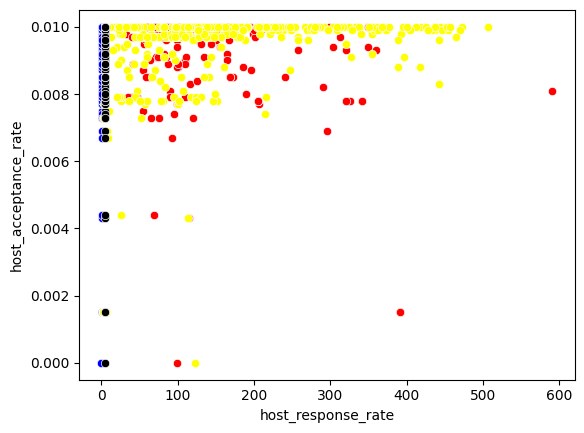

In [ ]:
from turtle import color
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=filtro1)
sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=filtro1)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="yellow", data=filtro1)
sns.scatterplot(x='review_scores_rating', y='host_acceptance_rate', color="black", data=filtro1)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= filtro1[['host_response_rate', 'price','number_of_reviews',"review_scores_rating"]]
Var_Dep= filtro1['host_acceptance_rate']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate', 'price', 'number_of_reviews',
        'review_scores_rating'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 6.52624030e-03, -1.03607187e-05,  2.82203909e-06, -3.83440608e-04]),
 'rank_': 4,
 'singular_': array([2.28858177e+03, 1.42858965e+03, 3.52768552e+00, 1.25001497e+00]),
 'intercept_': 0.005543225070561706}

**Modelo matemático: y= 0.62534291x1 + 0.01978015x2 + 0.81582765x3 + 1.2098448339476615**

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.42648672875495597

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=filtro1[['host_response_rate', 'price','number_of_reviews',"review_scores_rating"]])
y_pred

array([0.00931829, 0.0102466 , 0.00937884, 0.0100253 , 0.01056216,
       0.00943865, 0.00957151, 0.01030874, 0.00862357, 0.01037855,
       0.00861467, 0.01054989, 0.00711555, 0.00970551, 0.01012025,
       0.00971897, 0.01062438, 0.0099346 , 0.00970216, 0.00961937,
       0.0030558 , 0.00884161, 0.00987008, 0.00969602, 0.01013545,
       0.00677049, 0.00983121, 0.0091255 , 0.00990379, 0.00928963,
       0.0103826 , 0.00816667, 0.00987094, 0.00844601, 0.01015821,
       0.01051574, 0.00972113, 0.01001325, 0.00892665, 0.00968983,
       0.00967618, 0.00964839, 0.01041154, 0.01043788, 0.00972568,
       0.00930698, 0.00663997, 0.00996991, 0.0097265 , 0.00986817,
       0.00970801, 0.01013097, 0.00958501, 0.0098302 , 0.00924003,
       0.00971188, 0.00743556, 0.01079764, 0.01005746, 0.01016321,
       0.00996286, 0.00912476, 0.00914775, 0.00925591, 0.00990666,
       0.0104444 , 0.00978254, 0.00934554, 0.01010862, 0.00875892,
       0.00995353, 0.00999035, 0.00953653, 0.0101135 , 0.00708

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
filtro1.insert(0, 'Predicciones', y_pred)
filtro1

,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
4,0.009318,4,https://www.airbnb.com/rooms/8739,06/03/2023,city scrape,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/80811/7a57d0e...,https://www.airbnb.com/users/show/7149,...,4.94,4.95,4.96,4.93,4.74,2.0,0.0,2.0,0.0,4.65
31,0.010247,31,https://www.airbnb.com/rooms/18904,06/03/2023,city scrape,Lower Haight Urban Zen With Private Bath,Welcome to the Lower Haight! My neighborhood a...,My home is located on Page Street which is one...,https://a0.muscache.com/pictures/11252601/977c...,https://www.airbnb.com/users/show/72464,...,4.94,4.91,4.91,4.90,4.77,1.0,0.0,1.0,0.0,3.23
46,0.009379,46,https://www.airbnb.com/rooms/530857,06/03/2023,city scrape,"Sunny, quiet private room with parking",1920's three bedroom house with a formal dinin...,2 blocks away is Broken Record. It's a whiskey...,https://a0.muscache.com/pictures/713aa5ff-4026...,https://www.airbnb.com/users/show/2607120,...,4.89,4.97,4.97,4.87,4.95,2.0,0.0,2.0,0.0,0.65
53,0.010025,53,https://www.airbnb.com/rooms/561602,06/03/2023,city scrape,"Great view in the Mission, 15 mins by bus down...",Stunning view of SFâ€™s highest hill from your...,My house on a quiet brick cul-de-sac in Bernal...,https://a0.muscache.com/pictures/0dc1946f-936c...,https://www.airbnb.com/users/show/2760904,...,4.98,5.00,4.98,4.88,4.91,1.0,0.0,1.0,0.0,1.90
55,0.010562,55,https://www.airbnb.com/rooms/568161,06/03/2023,city scrape,Comfortable Room in Glen Park (SF),We are registered with the Office of Short Ter...,I love the small town feel and charm of our li...,https://a0.muscache.com/pictures/7510175/71dea...,https://www.airbnb.com/users/show/2795397,...,4.90,4.95,4.96,4.91,4.87,1.0,0.0,1.0,0.0,3.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944,0.009806,1944,https://www.airbnb.com/rooms/18874472,06/03/2023,city scrape,Room inside of house,A large room inside residential house in Sunse...,safe and friendly neighborhood. Safeway only 2...,https://a0.muscache.com/pictures/be28c326-5b00...,https://www.airbnb.com/users/show/131502074,...,4.81,4.95,4.93,4.82,4.76,2.0,0.0,2.0,0.0,2.98
1957,0.010359,1957,https://www.airbnb.com/rooms/19029310,06/03/2023,city scrape,Deluxe Room-Shared Bath near Downtown !1,In the center of the city in a very vibrant ne...,"Like the general theme of San Francisco, our n...",https://a0.muscache.com/pictures/2ac5b8e6-f69f...,https://www.airbnb.com/users/show/6683937,...,4.58,4.70,4.70,4.11,4.46,3.0,0.0,3.0,0.0,1.10
1963,0.008634,1963,https://www.airbnb.com/rooms/19922726,06/03/2023,city scrape,Castro Private Guest Suite with Living Room,This expansive space features French parlor do...,"We are located in the heart of The Castro, ON ...",https://a0.muscache.com/pictures/62ddcc96-c68a...,https://www.airbnb.com/users/show/107400974,...,5.00,4.98,5.00,4.99,4.89,2.0,1.0,1.0,0.0,2.24
2002,0.007971,2002,https://www.airbnb.com/rooms/21113266,06/03/2023,city scrape,Martony's BNB and Zen Garden Hot Tub & Sauna S...,A dedicated space for our guests located below...,"Old San Francisco Irish, Italian & Hispanic N...",https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/2275870,...,4.94,4.96,4.96,4.82,4.86,3.0,1.0,2.0,0.0,3.43


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

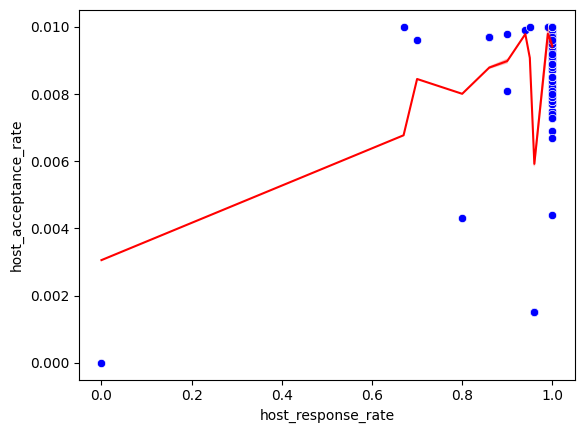

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=filtro1)
#sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=filtro1)

sns.lineplot(x='host_response_rate', y='Predicciones', color="red", data=filtro1)

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

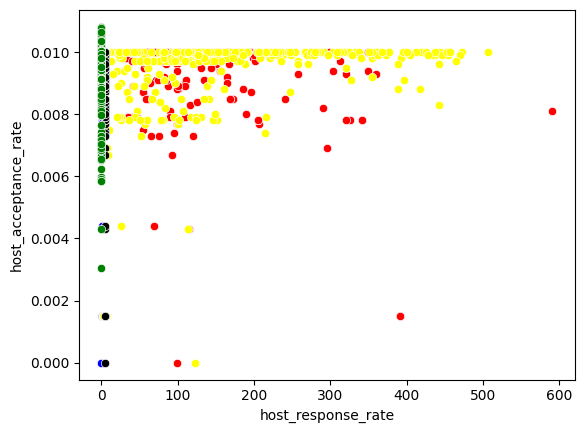

In [ ]:
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=filtro1)
sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=filtro1)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="yellow", data=filtro1)
sns.scatterplot(x='review_scores_rating', y='host_acceptance_rate', color="black", data=filtro1)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="green", data=filtro1)


In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.42648672875495597

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.653059513945671

##filtro **Private room** “Price” vs availability_365, host_response_rate, number_of_reviews, accommodates“







In [ ]:
filtro2 = california[california["room_type"] == "Private room"]

In [ ]:
filtro2 = filtro2.replace('sin registro', pd.np.nan)

<ipython-input-85-a0535f04630e>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  filtro2 = filtro2.replace('sin registro', pd.np.nan)


In [ ]:
filtro2.dropna(inplace=True)

In [ ]:
filtro2['host_acceptance_rate'] = filtro2['host_acceptance_rate'].replace('%', '', regex=True).astype('float') / 100

In [ ]:
filtro2['price'] = filtro2['price'].str.replace('$', '').astype(float)

<ipython-input-88-da36f8c173e3>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  filtro2['price'] = filtro2['price'].str.replace('$', '').astype(float)


In [ ]:
filtro2[['host_acceptance_rate',"host_response_rate"]] = filtro2[['host_acceptance_rate',"host_response_rate"]].replace('%', '', regex=True).astype('float') / 100

<Axes: xlabel='availability_365', ylabel='price'>

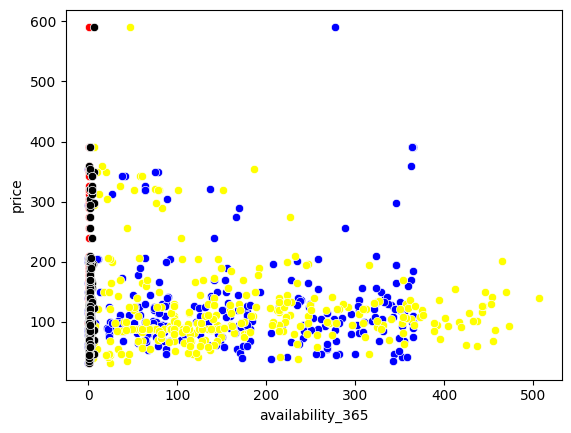

In [ ]:
from turtle import color


sns.scatterplot(x='availability_365', y='price', color="blue", data=filtro2)
sns.scatterplot(x='host_response_rate', y='price', color="red", data=filtro2)
sns.scatterplot(x='number_of_reviews', y='price', color="yellow", data=filtro2)
sns.scatterplot(x='accommodates', y='price', color="black", data=filtro2)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= filtro2[['availability_365', 'host_response_rate','number_of_reviews',"accommodates"]]
Var_Dep= filtro2['price']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365', 'host_response_rate', 'number_of_reviews',
        'accommodates'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 0.09975763, 47.74240584, -0.17896872, 32.68119441]),
 'rank_': 4,
 'singular_': array([2.27759170e+03, 2.10111927e+03, 1.71807066e+01, 1.28832370e+00]),
 'intercept_': 28.498418938611792}

**Modelo matemático: y= 0.62534291x1 + 0.01978015x2 + 0.81582765x3 + 1.2098448339476615**

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.21655171015343355

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=filtro2[['availability_365', 'host_response_rate','number_of_reviews',"accommodates"]])
y_pred

array([172.9469771 ,  67.90649742, 135.14098336, 104.26066942,
        48.72447204, 100.99302598, 111.71876574,  95.48906377,
       165.38123035,  62.53537206, 202.31241567,  79.04393013,
       146.72329954, 126.88129309,  99.1443953 , 127.76395752,
        92.16545193, 160.11503117, 121.46554175, 137.3999124 ,
        39.34542937, 216.19110977, 116.62522326, 108.07505555,
        74.0122594 , 163.60087633, 260.15570097, 149.50870366,
       104.62676988,  85.77127624,  71.39206435, 104.08986372,
        79.89691848,  28.67149723, 154.80152927,  89.54172398,
       109.96740087,  89.85261821,  94.17582742, 150.96936732,
       117.44251083, 108.52735833,  91.48657939,  91.25545408,
       133.96713448, 136.01818091, 145.90469196,  69.32960091,
       174.34411365, 125.84885276, 106.76325645, 104.17067374,
       121.16052307, 117.23129964, 120.47447342,  95.03053194,
       143.70760687, 119.91666722, 133.80863772, 107.0900671 ,
        90.30817497, 211.18898536, 162.62315966, 134.44

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
filtro2.insert(0, 'Predicciones', y_pred)
filtro2

,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
4,172.946977,4,https://www.airbnb.com/rooms/8739,06/03/2023,city scrape,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/80811/7a57d0e...,https://www.airbnb.com/users/show/7149,...,4.94,4.95,4.96,4.93,4.74,2.0,0.0,2.0,0.0,4.65
31,67.906497,31,https://www.airbnb.com/rooms/18904,06/03/2023,city scrape,Lower Haight Urban Zen With Private Bath,Welcome to the Lower Haight! My neighborhood a...,My home is located on Page Street which is one...,https://a0.muscache.com/pictures/11252601/977c...,https://www.airbnb.com/users/show/72464,...,4.94,4.91,4.91,4.90,4.77,1.0,0.0,1.0,0.0,3.23
46,135.140983,46,https://www.airbnb.com/rooms/530857,06/03/2023,city scrape,"Sunny, quiet private room with parking",1920's three bedroom house with a formal dinin...,2 blocks away is Broken Record. It's a whiskey...,https://a0.muscache.com/pictures/713aa5ff-4026...,https://www.airbnb.com/users/show/2607120,...,4.89,4.97,4.97,4.87,4.95,2.0,0.0,2.0,0.0,0.65
53,104.260669,53,https://www.airbnb.com/rooms/561602,06/03/2023,city scrape,"Great view in the Mission, 15 mins by bus down...",Stunning view of SFâ€™s highest hill from your...,My house on a quiet brick cul-de-sac in Bernal...,https://a0.muscache.com/pictures/0dc1946f-936c...,https://www.airbnb.com/users/show/2760904,...,4.98,5.00,4.98,4.88,4.91,1.0,0.0,1.0,0.0,1.90
55,48.724472,55,https://www.airbnb.com/rooms/568161,06/03/2023,city scrape,Comfortable Room in Glen Park (SF),We are registered with the Office of Short Ter...,I love the small town feel and charm of our li...,https://a0.muscache.com/pictures/7510175/71dea...,https://www.airbnb.com/users/show/2795397,...,4.90,4.95,4.96,4.91,4.87,1.0,0.0,1.0,0.0,3.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944,122.413304,1944,https://www.airbnb.com/rooms/18874472,06/03/2023,city scrape,Room inside of house,A large room inside residential house in Sunse...,safe and friendly neighborhood. Safeway only 2...,https://a0.muscache.com/pictures/be28c326-5b00...,https://www.airbnb.com/users/show/131502074,...,4.81,4.95,4.93,4.82,4.76,2.0,0.0,2.0,0.0,2.98
1957,123.188122,1957,https://www.airbnb.com/rooms/19029310,06/03/2023,city scrape,Deluxe Room-Shared Bath near Downtown !1,In the center of the city in a very vibrant ne...,"Like the general theme of San Francisco, our n...",https://a0.muscache.com/pictures/2ac5b8e6-f69f...,https://www.airbnb.com/users/show/6683937,...,4.58,4.70,4.70,4.11,4.46,3.0,0.0,3.0,0.0,1.10
1963,153.404011,1963,https://www.airbnb.com/rooms/19922726,06/03/2023,city scrape,Castro Private Guest Suite with Living Room,This expansive space features French parlor do...,"We are located in the heart of The Castro, ON ...",https://a0.muscache.com/pictures/62ddcc96-c68a...,https://www.airbnb.com/users/show/107400974,...,5.00,4.98,5.00,4.99,4.89,2.0,1.0,1.0,0.0,2.24
2002,117.537081,2002,https://www.airbnb.com/rooms/21113266,06/03/2023,city scrape,Martony's BNB and Zen Garden Hot Tub & Sauna S...,A dedicated space for our guests located below...,"Old San Francisco Irish, Italian & Hispanic N...",https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/2275870,...,4.94,4.96,4.96,4.82,4.86,3.0,1.0,2.0,0.0,3.43


In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

#sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=filtro1)
#sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=filtro1)

#sns.lineplot(x='host_response_rate', y='Predicciones', color="red", data=filtro1)

<Axes: xlabel='number_of_reviews', ylabel='price'>

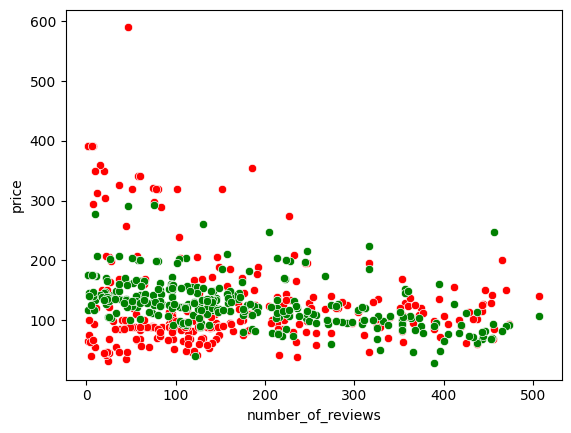

In [ ]:
#sns.scatterplot(x='availability_365', y='price', color="blue", data=filtro2)
sns.scatterplot(x='number_of_reviews', y='price', color="red", data=filtro2)
#sns.scatterplot(x='number_of_reviews', y='price', color="yellow", data=filtro2)
#sns.scatterplot(x='accommodates', y='price', color="black", data=filtro2)
sns.scatterplot(x='number_of_reviews', y='Predicciones', color="green", data=filtro2)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.21655171015343355

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.46535116863873194

##filtro **Private room** “host_acceptance_rate vs number_of_reviews,review_scores_cleanliness,review_scores_communication ”








In [ ]:
filtro3 = california[california["room_type"] == "Private room"]

In [ ]:
filtro3 = filtro3.replace('sin registro', pd.np.nan)

<ipython-input-104-78784c3836ad>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  filtro3 = filtro3.replace('sin registro', pd.np.nan)


In [ ]:
filtro3['host_acceptance_rate'] = filtro3['host_acceptance_rate'].replace('%', '', regex=True).astype('float') / 100

In [ ]:
filtro3['price'] = filtro3['price'].str.replace('$', '').astype(float)

<ipython-input-106-782e8b64c50d>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  filtro3['price'] = filtro3['price'].str.replace('$', '').astype(float)


In [ ]:
filtro3[['host_acceptance_rate',"host_response_rate"]] = filtro3[['host_acceptance_rate',"host_response_rate"]].replace('%', '', regex=True).astype('float') / 100

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

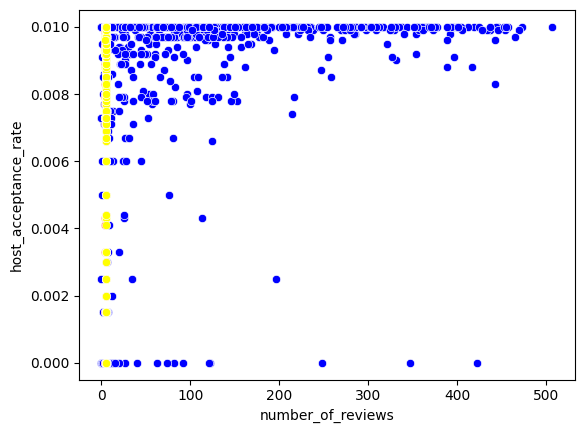

In [ ]:
from turtle import color


sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=filtro3)
sns.scatterplot(x='review_scores_cleanliness', y='host_acceptance_rate', color="red", data=filtro3)
sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="yellow", data=filtro3)
#sns.scatterplot(x='accommodates', y='host_acceptance_rate', color="black", data=filtro3)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= filtro3['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']]
Var_Dep= filtro3['host_acceptance_rate']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'review_scores_cleanliness',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 4.81853376e-06,  1.30734323e-03, -2.65665294e-03]),
 'rank_': 3,
 'singular_': array([2.25107961e+03, 4.01261887e+00, 2.13462224e+00]),
 'intercept_': 0.015106531805364755}

**Modelo matemático: y= 0.62534291x1 + 0.01978015x2 + 0.81582765x3 + 1.2098448339476615**

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.16803431094464816

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=filtro3[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']])
y_pred

array([0.0082557 , 0.00885087, 0.00900309, 0.00845154, 0.00872875,
       0.0074583 , 0.0097166 , 0.01048458, 0.01065525, 0.00817767,
       0.00862433, 0.00886856, 0.00890988, 0.00884493, 0.00847898,
       0.00957233, 0.01024365, 0.009962  , 0.00876649, 0.008904  ,
       0.01032897, 0.00844516, 0.0086491 , 0.01053399, 0.00854092,
       0.01036247, 0.00817146, 0.00887507, 0.00834561, 0.00894986,
       0.00984225, 0.00994666, 0.00845879, 0.00844332, 0.01060413,
       0.00837444, 0.01037125, 0.008549  , 0.00794997, 0.00865419,
       0.00906077, 0.00852276, 0.00806529, 0.00836418, 0.00836418,
       0.00870868, 0.00906373, 0.00951136, 0.009945  , 0.00881992,
       0.00864666, 0.01039776, 0.00870076, 0.00919967, 0.00839791,
       0.00988457, 0.008369  , 0.00893976, 0.0084729 , 0.00904547,
       0.00836132, 0.00868949, 0.00862502, 0.00944801, 0.00817146,
       0.01072725, 0.00849008, 0.00938511, 0.00898266, 0.01062066,
       0.00848694, 0.00903945, 0.00865665, 0.00828497, 0.00839

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
filtro3.insert(0, 'Predicciones', y_pred)
filtro3

,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2,0.008256,2,https://www.airbnb.com/rooms/8142,06/03/2023,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/12d8bff0-1698...,https://www.airbnb.com/users/show/21994,...,4.44,4.78,4.78,4.67,4.67,13.0,0.0,13.0,0.0,0.09
4,0.008851,4,https://www.airbnb.com/rooms/8739,06/03/2023,city scrape,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/80811/7a57d0e...,https://www.airbnb.com/users/show/7149,...,4.94,4.95,4.96,4.93,4.74,2.0,0.0,2.0,0.0,4.65
6,0.009003,6,https://www.airbnb.com/rooms/490931,06/03/2023,city scrape,"Mission's ""La Lengua""",Sunny apt in a great corner of the Mission. Y...,"great food, bars, and walk to everything, incl...",https://a0.muscache.com/pictures/5841012/ee765...,https://www.airbnb.com/users/show/1269188,...,4.75,4.70,4.78,4.77,4.66,1.0,0.0,1.0,0.0,0.74
7,0.008452,7,https://www.airbnb.com/rooms/10537,06/03/2023,city scrape,Elegant & Cozy w/City views. Private room: Purple,Casa de Paz (House of Peace) is like staying w...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/36752,...,5.00,4.86,5.00,4.14,4.46,2.0,0.0,2.0,0.0,0.12
11,0.008729,11,https://www.airbnb.com/rooms/144978,06/03/2023,city scrape,Prime Location - Small Basic Room,<b>The space</b><br />This is a small room in ...,NaN,https://a0.muscache.com/pictures/915742/ada9fb...,https://www.airbnb.com/users/show/216682,...,4.45,4.86,4.81,4.82,4.67,9.0,4.0,5.0,0.0,0.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,0.010541,2041,https://www.airbnb.com/rooms/21203146,06/03/2023,city scrape,Deluxe Studio with Private Bath in Sunset!,Our large private studio (300 sq.ft) with beau...,We are conveniently located in one of the safe...,https://a0.muscache.com/pictures/22d35828-27eb...,https://www.airbnb.com/users/show/153157973,...,4.93,4.99,4.97,4.84,4.83,2.0,0.0,2.0,0.0,1.10
2042,0.009021,2042,https://www.airbnb.com/rooms/21220773,06/03/2023,city scrape,Captainâ€™s Room at Engine 43 firehouse + Parking,Stay in the Captainâ€™s Room of the historic f...,The Excelsior is one of the less expensive nei...,https://a0.muscache.com/pictures/27f44441-6bf0...,https://www.airbnb.com/users/show/3570084,...,4.49,4.84,4.89,4.77,4.77,1.0,0.0,1.0,0.0,3.36
2044,0.010244,2044,https://www.airbnb.com/rooms/21231615,06/03/2023,city scrape,Charming room with Private Bath in Sunset!,The great private room (180 sq.ft) with beauti...,We are conveniently located in one of the safe...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/153157973,...,4.95,4.96,4.97,4.77,4.85,2.0,0.0,2.0,0.0,1.10
2048,0.008820,2048,https://www.airbnb.com/rooms/21730505,06/03/2023,city scrape,140 Sq Ft Perfectly located close to Ocean Beach,"New renovated Cozy with Separated Entrance,<br...",NaN,https://a0.muscache.com/pictures/aa873f9c-3f52...,https://www.airbnb.com/users/show/157074592,...,4.21,4.77,4.71,4.76,4.51,4.0,0.0,4.0,0.0,2.37


In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

#sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=filtro1)
#sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=filtro1)

#sns.lineplot(x='host_response_rate', y='Predicciones', color="red", data=filtro1)

<Axes: xlabel='review_scores_cleanliness', ylabel='host_acceptance_rate'>

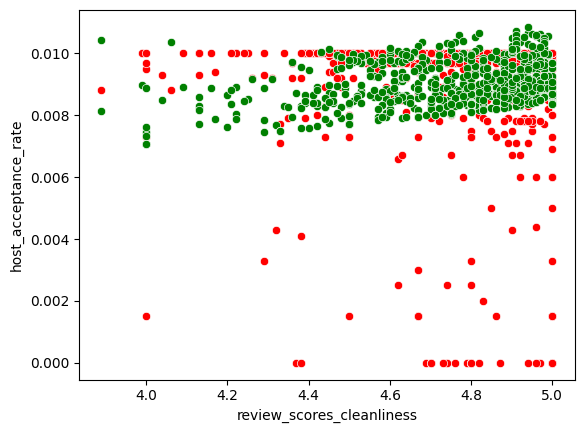

In [ ]:
#sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=filtro3)
sns.scatterplot(x='review_scores_cleanliness', y='host_acceptance_rate', color="red", data=filtro3)
#sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="yellow", data=filtro3)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones', color="green", data=filtro3)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.16803431094464816

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.40991988356829945

##MEX

In [ ]:
mex= pd.read_csv("Datos_limpios_IQR_mexico.csv")
mex.head(2)

,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,https://www.airbnb.com/rooms/2056638,30/03/23,city scrape,Amplio y luminoso loft en CoyoacÃ¡n,CÃ³modo loft de dos pisos magnÃ­ficamente ubic...,sin registro,https://a0.muscache.com/pictures/28353712/4379...,https://www.airbnb.com/users/show/10531228,Maria,...,4.95,5.00,4.95,5.00,4.86,3.0,3.0,0.0,0.0,0.19
1,1,https://www.airbnb.com/rooms/2072354,30/03/23,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,https://www.airbnb.com/users/show/16840050,MÃ³nica,...,4.88,4.93,5.00,4.95,4.84,2.0,2.0,0.0,0.0,0.54


##filtro **Private room**  “host_acceptance_rate vs host_response_rate, Price, number_of_reviews , review_scores_rating”






In [ ]:
filtro1 = mex[mex["room_type"] == "Private room"]

In [ ]:
filtro1 = filtro1.replace('sin registro', pd.np.nan)

<ipython-input-123-145afc511beb>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  filtro1 = filtro1.replace('sin registro', pd.np.nan)


In [ ]:
filtro1.dropna(inplace=True)

In [ ]:
filtro1['host_acceptance_rate'] = filtro1['host_acceptance_rate'].replace('%', '', regex=True).astype('float') / 100

In [ ]:
filtro1['price'] =filtro1['price'] .replace({"1,089.00":"$1089.00"},regex=False)

In [ ]:
filtro1['price'] = filtro1['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [ ]:
#= filtro1['price'].str.replace('$', '').astype(float)

In [ ]:
filtro1[['host_acceptance_rate',"host_response_rate"]] = filtro1[['host_acceptance_rate',"host_response_rate"]].replace('%', '', regex=True).astype('float') / 100

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

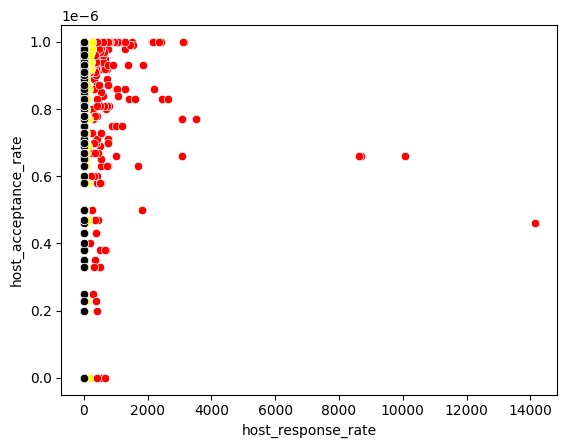

In [ ]:
from turtle import color


sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=filtro1)
sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=filtro1)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="yellow", data=filtro1)
sns.scatterplot(x='review_scores_rating', y='host_acceptance_rate', color="black", data=filtro1)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= filtro1[['host_response_rate', 'price','number_of_reviews',"review_scores_rating"]]
Var_Dep= filtro1['host_acceptance_rate']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate', 'price', 'number_of_reviews',
        'review_scores_rating'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 4.40691366e-05, -5.59195931e-12,  8.29923916e-10, -1.72113106e-07]),
 'rank_': 4,
 'singular_': array([2.19811149e+04, 1.00697105e+03, 2.44762606e+00, 3.32071751e-02]),
 'intercept_': 1.2141262807746207e-06}

**Modelo matemático: y= 0.62534291x1 + 0.01978015x2 + 0.81582765x3 + 1.2098448339476615**

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.25072280789849877

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=filtro1[['host_response_rate', 'price','number_of_reviews',"review_scores_rating"]])
y_pred

array([8.53386804e-07, 8.98236856e-07, 9.08619715e-07, 8.41968368e-07,
       8.15396488e-07, 1.01844465e-06, 9.18363333e-07, 9.13259544e-07,
       8.43459950e-07, 8.51737667e-07, 6.34569672e-07, 7.25791229e-07,
       9.25643384e-07, 8.44467903e-07, 7.91818650e-07, 8.11344569e-07,
       8.85198325e-07, 8.22202516e-07, 8.43272614e-07, 8.68687497e-07,
       8.48569808e-07, 7.99531697e-07, 8.80738286e-07, 9.61206323e-07,
       8.49183554e-07, 8.51776670e-07, 7.31983211e-07, 7.77473218e-07,
       8.38501404e-07, 8.03468823e-07, 8.27810475e-07, 9.03586413e-07,
       9.72104845e-07, 9.32756037e-07, 8.55202821e-07, 6.37146117e-07,
       4.18757457e-07, 8.45054095e-07, 9.59657270e-07, 8.77264154e-07,
       8.16023066e-07, 7.94080115e-07, 7.90888071e-07, 8.99720269e-07,
       7.92547919e-07, 8.77983733e-07, 8.24533348e-07, 8.50413424e-07,
       9.61348487e-07, 8.48584757e-07, 8.95857729e-07, 7.77629305e-07,
       8.03067166e-07, 8.58151164e-07, 8.56115812e-07, 8.54760694e-07,
      

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
filtro1.insert(0, 'Predicciones', y_pred)
filtro1

,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
7,8.533868e-07,7,https://www.airbnb.com/rooms/61792,30/03/23,city scrape,Spacious Clean Quiet room (own bath) in Condesa,"Located in La Condesa, one of the best neighbo...",You are going to be in one of the nicest neigh...,https://a0.muscache.com/pictures/4c674e38-42f8...,https://www.airbnb.com/users/show/299558,...,4.90,4.92,4.95,4.94,4.87,2.0,0.0,2.0,0.0,0.94
29,8.982369e-07,29,https://www.airbnb.com/rooms/171109,30/03/23,city scrape,Cool room near WTC and Metrobus,"Stay in a private room 2 blocks away from WTC,...","Great location, feel comfortable and secure at...",https://a0.muscache.com/pictures/16040866/8b0a...,https://www.airbnb.com/users/show/816295,...,4.59,4.98,4.94,4.98,4.78,2.0,0.0,2.0,0.0,0.82
43,9.086197e-07,43,https://www.airbnb.com/rooms/832805,29/03/23,city scrape,ROOMS CASA INDIGO WITH TERRACE AT CITY CENTER,Reformed House from the Art Deco period built ...,"Is located in a very convenient area, I like t...",https://a0.muscache.com/pictures/37fdf31d-778f...,https://www.airbnb.com/users/show/3777702,...,4.67,4.90,4.92,4.90,4.80,6.0,3.0,3.0,0.0,1.02
57,8.419684e-07,57,https://www.airbnb.com/rooms/252618,29/03/23,city scrape,"""Chavela"" Private & Furnished Room","<b>The space</b><br />""Chavela"" is a very nice...",roma district<br /> <br />The Roma district of...,https://a0.muscache.com/pictures/29834683/4ac7...,https://www.airbnb.com/users/show/1326107,...,4.80,4.90,4.90,4.68,4.80,4.0,2.0,2.0,0.0,0.15
59,8.153965e-07,59,https://www.airbnb.com/rooms/2284377,30/03/23,city scrape,Comfy room in Polanco,"safe&quiet, our 3bd apartment has all you need...",we have a 24hour supermarket 30 steps from our...,https://a0.muscache.com/pictures/c21a74bb-1b70...,https://www.airbnb.com/users/show/11668406,...,4.90,4.90,4.95,5.00,4.90,1.0,0.0,1.0,0.0,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2284,1.008126e-06,2284,https://www.airbnb.com/rooms/17679256,30/03/23,city scrape,Easy Stay,"The room is absolutely independent, with its o...",It is close to everything.,https://a0.muscache.com/pictures/4d037f2b-b027...,https://www.airbnb.com/users/show/106732364,...,4.97,4.97,4.94,4.98,4.92,3.0,1.0,2.0,0.0,0.90
2285,8.540538e-07,2285,https://www.airbnb.com/rooms/17880682,30/03/23,city scrape,SUNNY ROOM ESCANDÃN. (Close to Roma/Condesa).,"Hi! Welcome to my space, which I hope will mak...",Safe and centrally located neighborhood with g...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/105514034,...,4.48,4.83,4.88,4.88,4.75,2.0,0.0,2.0,0.0,0.34
2292,8.332265e-07,2292,https://www.airbnb.com/rooms/18117641,30/03/23,city scrape,"Artsy, wide aptm'nt near everything - 2","Artsy wide department, elegant decoration with...",2 blocks away from Insurgentes Ave (the most i...,https://a0.muscache.com/pictures/cfbc5baf-b8df...,https://www.airbnb.com/users/show/31069253,...,4.82,4.91,4.91,4.82,4.82,2.0,0.0,2.0,0.0,0.15
2317,8.797317e-07,2317,https://www.airbnb.com/rooms/17945570,29/03/23,city scrape,HabitaciÃ³n independiente remodelada en Narvarte,QuÃ©date en un espacio seguro y tranquilo ubic...,Narvarte estÃ¡ en el centro geogrÃ¡fico de la ...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/100268859,...,4.50,4.90,4.90,4.90,4.80,1.0,0.0,1.0,0.0,2.00


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

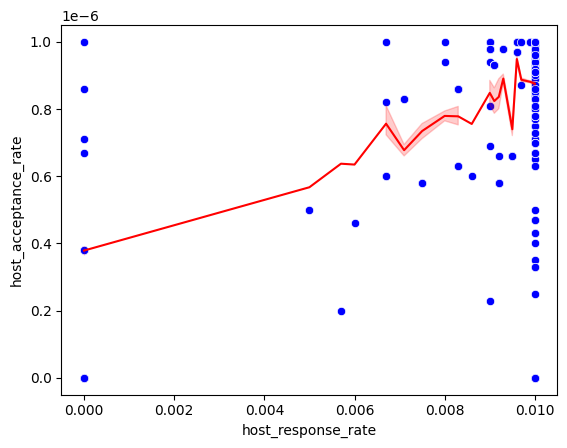

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=filtro1)
#sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=filtro1)

sns.lineplot(x='host_response_rate', y='Predicciones', color="red", data=filtro1)

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

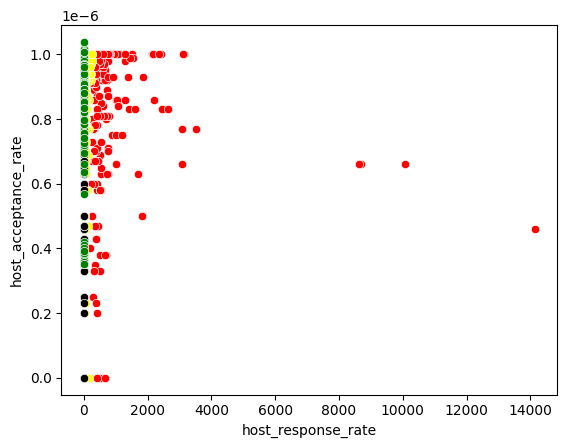

In [ ]:
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=filtro1)
sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=filtro1)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="yellow", data=filtro1)
sns.scatterplot(x='review_scores_rating', y='host_acceptance_rate', color="black", data=filtro1)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="green", data=filtro1)


In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.25072280789849877

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.5007222862011425

##filtro **Private room** “Price” vs availability_365, host_response_rate, number_of_reviews, accommodates“







In [ ]:
filtro2 = mex[mex["room_type"] == "Private room"]

In [ ]:
filtro2 = filtro2.replace('sin registro', pd.np.nan)

<ipython-input-179-a0535f04630e>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  filtro2 = filtro2.replace('sin registro', pd.np.nan)


In [ ]:
filtro2.dropna(inplace=True)

In [ ]:
filtro2['host_acceptance_rate'] = filtro2['host_acceptance_rate'].replace('%', '', regex=True).astype('float') / 100

In [ ]:
filtro2['price'] = filtro2['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [ ]:
filtro2[['host_acceptance_rate',"host_response_rate"]] = filtro2[['host_acceptance_rate',"host_response_rate"]].replace('%', '', regex=True).astype('float') / 100

<Axes: xlabel='availability_365', ylabel='price'>

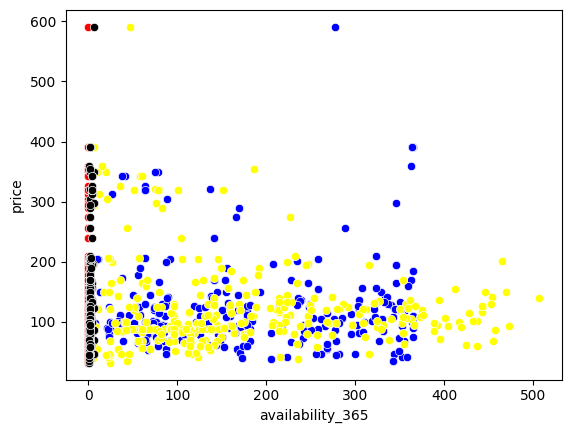

In [ ]:
from turtle import color


sns.scatterplot(x='availability_365', y='price', color="blue", data=filtro2)
sns.scatterplot(x='host_response_rate', y='price', color="red", data=filtro2)
sns.scatterplot(x='number_of_reviews', y='price', color="yellow", data=filtro2)
sns.scatterplot(x='accommodates', y='price', color="black", data=filtro2)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= filtro2[['availability_365', 'host_response_rate','number_of_reviews',"accommodates"]]
Var_Dep= filtro2['price']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365', 'host_response_rate', 'number_of_reviews',
        'accommodates'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 9.97576301e-02,  4.77424058e+03, -1.78968721e-01,  3.26811944e+01]),
 'rank_': 4,
 'singular_': array([2.27759169e+03, 2.10111926e+03, 1.71805297e+01, 1.28833697e-02]),
 'intercept_': 28.49841893850531}

**Modelo matemático: y= 0.62534291x1 + 0.01978015x2 + 0.81582765x3 + 1.2098448339476615**

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.21655171015343344

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=filtro2[['availability_365', 'host_response_rate','number_of_reviews',"accommodates"]])
y_pred

array([172.9469771 ,  67.90649742, 135.14098336, 104.26066942,
        48.72447204, 100.99302598, 111.71876574,  95.48906377,
       165.38123035,  62.53537206, 202.31241567,  79.04393013,
       146.72329954, 126.88129309,  99.1443953 , 127.76395752,
        92.16545193, 160.11503116, 121.46554175, 137.3999124 ,
        39.34542937, 216.19110977, 116.62522326, 108.07505555,
        74.0122594 , 163.60087633, 260.15570097, 149.50870366,
       104.62676988,  85.77127624,  71.39206435, 104.08986372,
        79.89691848,  28.67149723, 154.80152927,  89.54172398,
       109.96740087,  89.85261821,  94.17582742, 150.96936733,
       117.44251083, 108.52735833,  91.48657939,  91.25545408,
       133.96713448, 136.01818091, 145.90469196,  69.32960091,
       174.34411365, 125.84885276, 106.76325645, 104.17067374,
       121.16052307, 117.23129964, 120.47447342,  95.03053194,
       143.70760687, 119.91666722, 133.80863772, 107.0900671 ,
        90.30817497, 211.18898536, 162.62315966, 134.44

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
filtro2.insert(0, 'Predicciones', y_pred)
filtro2

,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
4,172.946977,4,https://www.airbnb.com/rooms/8739,06/03/2023,city scrape,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/80811/7a57d0e...,https://www.airbnb.com/users/show/7149,...,4.94,4.95,4.96,4.93,4.74,2.0,0.0,2.0,0.0,4.65
31,67.906497,31,https://www.airbnb.com/rooms/18904,06/03/2023,city scrape,Lower Haight Urban Zen With Private Bath,Welcome to the Lower Haight! My neighborhood a...,My home is located on Page Street which is one...,https://a0.muscache.com/pictures/11252601/977c...,https://www.airbnb.com/users/show/72464,...,4.94,4.91,4.91,4.90,4.77,1.0,0.0,1.0,0.0,3.23
46,135.140983,46,https://www.airbnb.com/rooms/530857,06/03/2023,city scrape,"Sunny, quiet private room with parking",1920's three bedroom house with a formal dinin...,2 blocks away is Broken Record. It's a whiskey...,https://a0.muscache.com/pictures/713aa5ff-4026...,https://www.airbnb.com/users/show/2607120,...,4.89,4.97,4.97,4.87,4.95,2.0,0.0,2.0,0.0,0.65
53,104.260669,53,https://www.airbnb.com/rooms/561602,06/03/2023,city scrape,"Great view in the Mission, 15 mins by bus down...",Stunning view of SFâ€™s highest hill from your...,My house on a quiet brick cul-de-sac in Bernal...,https://a0.muscache.com/pictures/0dc1946f-936c...,https://www.airbnb.com/users/show/2760904,...,4.98,5.00,4.98,4.88,4.91,1.0,0.0,1.0,0.0,1.90
55,48.724472,55,https://www.airbnb.com/rooms/568161,06/03/2023,city scrape,Comfortable Room in Glen Park (SF),We are registered with the Office of Short Ter...,I love the small town feel and charm of our li...,https://a0.muscache.com/pictures/7510175/71dea...,https://www.airbnb.com/users/show/2795397,...,4.90,4.95,4.96,4.91,4.87,1.0,0.0,1.0,0.0,3.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944,122.413304,1944,https://www.airbnb.com/rooms/18874472,06/03/2023,city scrape,Room inside of house,A large room inside residential house in Sunse...,safe and friendly neighborhood. Safeway only 2...,https://a0.muscache.com/pictures/be28c326-5b00...,https://www.airbnb.com/users/show/131502074,...,4.81,4.95,4.93,4.82,4.76,2.0,0.0,2.0,0.0,2.98
1957,123.188122,1957,https://www.airbnb.com/rooms/19029310,06/03/2023,city scrape,Deluxe Room-Shared Bath near Downtown !1,In the center of the city in a very vibrant ne...,"Like the general theme of San Francisco, our n...",https://a0.muscache.com/pictures/2ac5b8e6-f69f...,https://www.airbnb.com/users/show/6683937,...,4.58,4.70,4.70,4.11,4.46,3.0,0.0,3.0,0.0,1.10
1963,153.404011,1963,https://www.airbnb.com/rooms/19922726,06/03/2023,city scrape,Castro Private Guest Suite with Living Room,This expansive space features French parlor do...,"We are located in the heart of The Castro, ON ...",https://a0.muscache.com/pictures/62ddcc96-c68a...,https://www.airbnb.com/users/show/107400974,...,5.00,4.98,5.00,4.99,4.89,2.0,1.0,1.0,0.0,2.24
2002,117.537081,2002,https://www.airbnb.com/rooms/21113266,06/03/2023,city scrape,Martony's BNB and Zen Garden Hot Tub & Sauna S...,A dedicated space for our guests located below...,"Old San Francisco Irish, Italian & Hispanic N...",https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/2275870,...,4.94,4.96,4.96,4.82,4.86,3.0,1.0,2.0,0.0,3.43


In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

#sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=filtro1)
#sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=filtro1)

#sns.lineplot(x='host_response_rate', y='Predicciones', color="red", data=filtro1)

<Axes: xlabel='number_of_reviews', ylabel='price'>

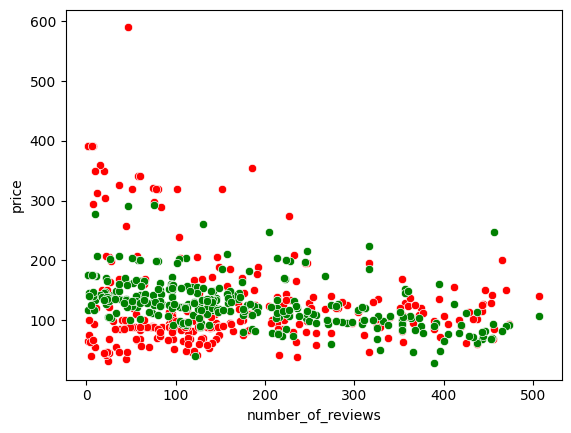

In [ ]:
#sns.scatterplot(x='availability_365', y='price', color="blue", data=filtro2)
sns.scatterplot(x='number_of_reviews', y='price', color="red", data=filtro2)
#sns.scatterplot(x='number_of_reviews', y='price', color="yellow", data=filtro2)
#sns.scatterplot(x='accommodates', y='price', color="black", data=filtro2)
sns.scatterplot(x='number_of_reviews', y='Predicciones', color="green", data=filtro2)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.21655171015343344

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.4653511686387318

##filtro **Private room** “host_acceptance_rate vs number_of_reviews,review_scores_cleanliness,review_scores_communication ”








In [ ]:
filtro3 = mex[mex["room_type"] == "Private room"]

In [ ]:
filtro3 = filtro3.replace('sin registro', pd.np.nan)

<ipython-input-208-78784c3836ad>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  filtro3 = filtro3.replace('sin registro', pd.np.nan)


In [ ]:
filtro3.dropna(inplace=True)

In [ ]:
filtro3['host_acceptance_rate'] = filtro3['host_acceptance_rate'].replace('%', '', regex=True).astype('float') / 100

In [ ]:
filtro3['price'] = filtro3['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [ ]:
filtro3[['host_acceptance_rate',"host_response_rate"]] = filtro3[['host_acceptance_rate',"host_response_rate"]].replace('%', '', regex=True).astype('float') / 100

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

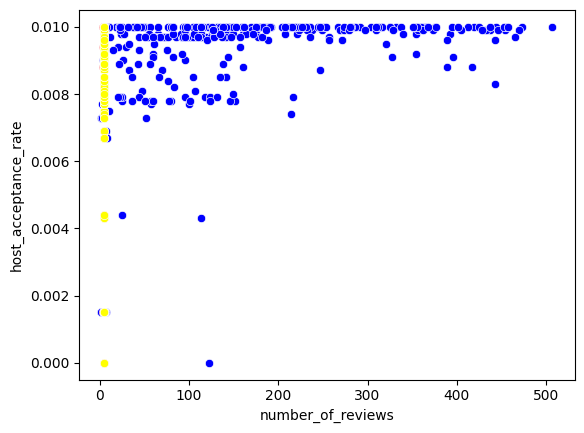

In [ ]:
from turtle import color


sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=filtro3)
sns.scatterplot(x='review_scores_cleanliness', y='host_acceptance_rate', color="red", data=filtro3)
sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="yellow", data=filtro3)
#sns.scatterplot(x='accommodates', y='host_acceptance_rate', color="black", data=filtro3)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= filtro3[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']]
Var_Dep= filtro3['host_acceptance_rate']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'review_scores_cleanliness',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 4.81853376e-10,  1.30734323e-07, -2.65665294e-07]),
 'rank_': 3,
 'singular_': array([2.25107961e+03, 4.01261887e+00, 2.13462224e+00]),
 'intercept_': 1.5106531805364757e-06}

**Modelo matemático: y= 0.62534291x1 + 0.01978015x2 + 0.81582765x3 + 1.2098448339476615**

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.16803431094464805

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=filtro3[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']])
y_pred

array([8.85086986e-07, 1.06552519e-06, 8.47897936e-07, 9.57232874e-07,
       1.02436544e-06, 9.96199606e-07, 8.90399689e-07, 1.03289677e-06,
       8.64909527e-07, 1.05339873e-06, 8.54091617e-07, 1.03624695e-06,
       8.34560988e-07, 8.94985763e-07, 9.94666302e-07, 8.44331578e-07,
       1.06041261e-06, 1.03712489e-06, 8.54900095e-07, 9.06076896e-07,
       8.70868177e-07, 9.51136045e-07, 9.94499639e-07, 8.81992452e-07,
       1.03977624e-06, 9.19966711e-07, 8.93975677e-07, 9.04547403e-07,
       8.36132448e-07, 9.44800937e-07, 1.07272454e-06, 8.49008365e-07,
       8.98265696e-07, 1.06206567e-06, 9.03945266e-07, 1.04303667e-06,
       9.49786735e-07, 1.00121505e-06, 8.78782931e-07, 8.78292853e-07,
       7.71594869e-07, 9.19141221e-07, 9.97767255e-07, 1.01052461e-06,
       9.07443014e-07, 9.20737917e-07, 7.73731514e-07, 1.05349438e-06,
       9.59591669e-07, 9.46893607e-07, 9.39136090e-07, 9.91468817e-07,
       9.44554152e-07, 8.84388199e-07, 8.81606247e-07, 9.79482062e-07,
      

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
filtro3.insert(0, 'Predicciones', y_pred)
filtro3

,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
4,8.850870e-07,4,https://www.airbnb.com/rooms/8739,06/03/2023,city scrape,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/80811/7a57d0e...,https://www.airbnb.com/users/show/7149,...,4.94,4.95,4.96,4.93,4.74,2.0,0.0,2.0,0.0,4.65
31,1.065525e-06,31,https://www.airbnb.com/rooms/18904,06/03/2023,city scrape,Lower Haight Urban Zen With Private Bath,Welcome to the Lower Haight! My neighborhood a...,My home is located on Page Street which is one...,https://a0.muscache.com/pictures/11252601/977c...,https://www.airbnb.com/users/show/72464,...,4.94,4.91,4.91,4.90,4.77,1.0,0.0,1.0,0.0,3.23
46,8.478979e-07,46,https://www.airbnb.com/rooms/530857,06/03/2023,city scrape,"Sunny, quiet private room with parking",1920's three bedroom house with a formal dinin...,2 blocks away is Broken Record. It's a whiskey...,https://a0.muscache.com/pictures/713aa5ff-4026...,https://www.airbnb.com/users/show/2607120,...,4.89,4.97,4.97,4.87,4.95,2.0,0.0,2.0,0.0,0.65
53,9.572329e-07,53,https://www.airbnb.com/rooms/561602,06/03/2023,city scrape,"Great view in the Mission, 15 mins by bus down...",Stunning view of SFâ€™s highest hill from your...,My house on a quiet brick cul-de-sac in Bernal...,https://a0.muscache.com/pictures/0dc1946f-936c...,https://www.airbnb.com/users/show/2760904,...,4.98,5.00,4.98,4.88,4.91,1.0,0.0,1.0,0.0,1.90
55,1.024365e-06,55,https://www.airbnb.com/rooms/568161,06/03/2023,city scrape,Comfortable Room in Glen Park (SF),We are registered with the Office of Short Ter...,I love the small town feel and charm of our li...,https://a0.muscache.com/pictures/7510175/71dea...,https://www.airbnb.com/users/show/2795397,...,4.90,4.95,4.96,4.91,4.87,1.0,0.0,1.0,0.0,3.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944,9.294990e-07,1944,https://www.airbnb.com/rooms/18874472,06/03/2023,city scrape,Room inside of house,A large room inside residential house in Sunse...,safe and friendly neighborhood. Safeway only 2...,https://a0.muscache.com/pictures/be28c326-5b00...,https://www.airbnb.com/users/show/131502074,...,4.81,4.95,4.93,4.82,4.76,2.0,0.0,2.0,0.0,2.98
1957,9.740250e-07,1957,https://www.airbnb.com/rooms/19029310,06/03/2023,city scrape,Deluxe Room-Shared Bath near Downtown !1,In the center of the city in a very vibrant ne...,"Like the general theme of San Francisco, our n...",https://a0.muscache.com/pictures/2ac5b8e6-f69f...,https://www.airbnb.com/users/show/6683937,...,4.58,4.70,4.70,4.11,4.46,3.0,0.0,3.0,0.0,1.10
1963,9.077945e-07,1963,https://www.airbnb.com/rooms/19922726,06/03/2023,city scrape,Castro Private Guest Suite with Living Room,This expansive space features French parlor do...,"We are located in the heart of The Castro, ON ...",https://a0.muscache.com/pictures/62ddcc96-c68a...,https://www.airbnb.com/users/show/107400974,...,5.00,4.98,5.00,4.99,4.89,2.0,1.0,1.0,0.0,2.24
2002,9.481616e-07,2002,https://www.airbnb.com/rooms/21113266,06/03/2023,city scrape,Martony's BNB and Zen Garden Hot Tub & Sauna S...,A dedicated space for our guests located below...,"Old San Francisco Irish, Italian & Hispanic N...",https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/2275870,...,4.94,4.96,4.96,4.82,4.86,3.0,1.0,2.0,0.0,3.43


In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

#sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=filtro1)
#sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=filtro1)

#sns.lineplot(x='host_response_rate', y='Predicciones', color="red", data=filtro1)

<Axes: xlabel='review_scores_cleanliness', ylabel='host_acceptance_rate'>

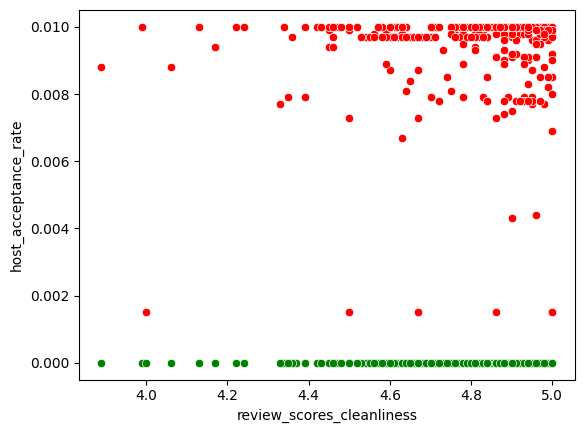

In [ ]:
#sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=filtro3)
sns.scatterplot(x='review_scores_cleanliness', y='host_acceptance_rate', color="red", data=filtro3)
#sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="yellow", data=filtro3)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones', color="green", data=filtro3)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.16803431094464805

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.4099198835682993

##ESP

In [ ]:
#españa= pd.read_csv("Girona_España.csv")
españa= pd.read_csv("Datos_limpios_IQR_España.csv")

españa.head(2)

,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,https://www.airbnb.com/rooms/14551,31/03/2023,city scrape,Cozy & Colorful by Nature (Private Room),Up in the hill of Montjuïc (a mountain overloo...,Montjuïc is most likely the best neighborhood ...,https://a0.muscache.com/pictures/16209908/f1fe...,https://www.airbnb.com/users/show/57237,Mun,...,4.94,4.89,4.91,4.63,4.74,1.0,0.0,0.0,0.0,0.37
1,1,https://www.airbnb.com/rooms/1205757,31/03/2023,city scrape,Habitación doble + baño y terraza,<b>The space</b><br />Habitación confortable e...,Bonitas playas a 15 minutos en coche. Piscina ...,https://a0.muscache.com/pictures/02e0a61e-078e...,https://www.airbnb.com/users/show/6586355,Montse,...,4.85,4.85,4.91,4.69,4.80,1.0,0.0,0.0,0.0,0.51


##filtro **Private room**  “host_acceptance_rate vs host_response_rate, Price, number_of_reviews , review_scores_rating”






In [ ]:
filtro1 = españa[españa["room_type"] == "Private room"]

In [ ]:
filtro1 = filtro1.replace('sin registro', pd.np.nan)

<ipython-input-435-145afc511beb>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  filtro1 = filtro1.replace('sin registro', pd.np.nan)


In [ ]:
#filtro1esp.dropna(inplace=True)

In [ ]:
filtro1['host_acceptance_rate'] = filtro1['host_acceptance_rate'].replace('%', '', regex=True).astype('float') / 100

In [ ]:
#filtro1['price'] =filtro1['price'] .replace({"1,089.00":"$1089.00"},regex=False)

In [ ]:
filtro1['price'] = filtro1['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [ ]:
#= filtro1['price'].str.replace('$', '').astype(float)

In [ ]:
filtro1[['host_acceptance_rate',"host_response_rate"]] = filtro1[['host_acceptance_rate',"host_response_rate"]].replace('%', '', regex=True).astype('float') / 100

In [ ]:
filtro1.dropna(subset=["host_response_rate","price","number_of_reviews","host_acceptance_rate","review_scores_rating"], inplace=True)

In [ ]:
filtro1[["host_response_rate","price","number_of_reviews","host_acceptance_rate","review_scores_rating"]].head(10)

,host_response_rate,price,number_of_reviews,host_acceptance_rate,review_scores_rating
0,1.00,42.0,56.0,0.0090,4.82
1,1.00,47.0,60.0,0.0042,4.80
3,1.00,45.0,9.0,0.0091,4.88
12,1.00,49.0,10.0,0.0091,4.60
13,1.00,53.0,11.0,0.0091,4.70
17,1.00,53.0,6.0,0.0091,4.67
19,1.00,79.0,17.0,0.0091,4.41
58,0.82,42.0,120.0,0.0052,4.43
99,1.00,70.0,30.5,0.0084,4.71
118,1.00,65.0,13.0,0.0045,4.85


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

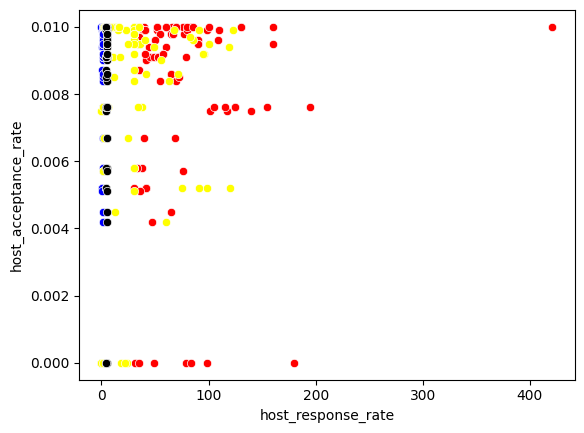

In [ ]:
from turtle import color


sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=filtro1)
sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=filtro1)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="yellow", data=filtro1)
sns.scatterplot(x='review_scores_rating', y='host_acceptance_rate', color="black", data=filtro1)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= filtro1[['host_response_rate', 'price','number_of_reviews',"review_scores_rating"]]
Var_Dep= filtro1['host_acceptance_rate']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate', 'price', 'number_of_reviews',
        'review_scores_rating'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 5.71806801e-03, -9.80968861e-07,  2.37860010e-06,  1.90925588e-03]),
 'rank_': 4,
 'singular_': array([497.84641188, 267.75713769,   2.44162886,   1.91228387]),
 'intercept_': -0.006144285094657085}

**Modelo matemático: y= 0.62534291x1 + 0.01978015x2 + 0.81582765x3 + 1.2098448339476615**

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.33297885115141823

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=filtro1[['host_response_rate', 'price','number_of_reviews',"review_scores_rating"]])
y_pred

array([0.0088684 , 0.00883482, 0.00886822, 0.00833208, 0.00852146,
       0.00845229, 0.00795654, 0.00724677, 0.00857026, 0.00880083,
       0.00715137, 0.00704407, 0.00867802, 0.00900594, 0.00698699,
       0.00854928, 0.00755615, 0.00804926, 0.00882876, 0.00849245,
       0.00836514, 0.00853698, 0.00899967, 0.00854241, 0.00835096,
       0.00856129, 0.00881178, 0.00815048, 0.00893294, 0.0088521 ,
       0.0025608 , 0.00260788, 0.00750645, 0.00306413, 0.00896433,
       0.00875526, 0.00317011, 0.008862  , 0.00881258, 0.00871246,
       0.00874457, 0.00810348, 0.00860292, 0.00827609, 0.00904789,
       0.00776226, 0.00845059, 0.00824159, 0.00821902, 0.00876378,
       0.00891629, 0.00706113, 0.00868714, 0.00831299, 0.00888064,
       0.00878605, 0.00877152, 0.00840003, 0.00852964, 0.00899729,
       0.00844689, 0.00881703, 0.00883782, 0.00868598, 0.00859342,
       0.00871183, 0.00856882, 0.00244211, 0.00923145, 0.00902795,
       0.00866572, 0.00894773, 0.00903495, 0.00494419, 0.00844

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
filtro1.insert(0, 'Predicciones', y_pred)
filtro1

,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0.008868,0,https://www.airbnb.com/rooms/14551,31/03/2023,city scrape,Cozy & Colorful by Nature (Private Room),Up in the hill of Montjuïc (a mountain overloo...,Montjuïc is most likely the best neighborhood ...,https://a0.muscache.com/pictures/16209908/f1fe...,https://www.airbnb.com/users/show/57237,...,4.94,4.89,4.91,4.63,4.74,1.0,0.0,0.0,0.0,0.37
1,0.008835,1,https://www.airbnb.com/rooms/1205757,31/03/2023,city scrape,Habitación doble + baño y terraza,<b>The space</b><br />Habitación confortable e...,Bonitas playas a 15 minutos en coche. Piscina ...,https://a0.muscache.com/pictures/02e0a61e-078e...,https://www.airbnb.com/users/show/6586355,...,4.85,4.85,4.91,4.69,4.80,1.0,0.0,0.0,0.0,0.51
3,0.008868,3,https://www.airbnb.com/rooms/751638,31/03/2023,city scrape,Room Limon - Casa Pati de l´Albera,<b>The space</b><br />Nice room with 2 individ...,"Sant Climent is a tiny village, with a populat...",https://a0.muscache.com/pictures/64276178/98d1...,https://www.airbnb.com/users/show/3680160,...,4.50,4.86,5.00,4.63,4.50,6.0,1.0,0.0,0.0,0.08
12,0.008332,12,https://www.airbnb.com/rooms/755927,31/03/2023,city scrape,Room Oliva - Casa Pati de l´Albera,"<b>The space</b><br />Wide double room, ground...","Sant Climent is a tiny village, with a populat...",https://a0.muscache.com/pictures/9eeac113-fa97...,https://www.airbnb.com/users/show/3680160,...,4.50,5.00,5.00,4.70,4.90,6.0,1.0,0.0,0.0,0.09
13,0.008521,13,https://www.airbnb.com/rooms/756145,31/03/2023,city scrape,Room Abeto - Casa Pati de l´Albera,Inside the rural house El Pati de l'Albera is ...,"Sant Climent is a tiny village, with a populat...",https://a0.muscache.com/pictures/64276036/162f...,https://www.airbnb.com/users/show/3680160,...,4.55,4.82,4.82,4.36,4.45,6.0,1.0,0.0,0.0,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,0.009042,1462,https://www.airbnb.com/rooms/9103239,01/04/2023,city scrape,Mas La Coma 1,Casa de campo del S.XVI. <br />Masia de tres p...,La casa está situada en medio de la naturaleza...,https://a0.muscache.com/pictures/e334e86f-2df8...,https://www.airbnb.com/users/show/46457505,...,4.84,4.95,4.96,4.88,4.78,3.0,0.0,0.0,0.0,1.06
1474,0.008946,1473,https://www.airbnb.com/rooms/9155731,01/04/2023,city scrape,Mas La Coma 3,Casa de campo del S.XVI. <br />Masia de tres p...,La casa está situada en medio de la naturaleza...,https://a0.muscache.com/pictures/dbcdcb92-d32a...,https://www.airbnb.com/users/show/46457505,...,4.77,4.98,4.96,4.92,4.82,3.0,0.0,0.0,0.0,0.30
1486,0.001413,1485,https://www.airbnb.com/rooms/10607075,31/03/2023,city scrape,APARTAMENTO en HOTEL FAMILIAR,"Situado en una zona rural, cerca del Pueblo de...",NaN,https://a0.muscache.com/pictures/43c05d00-fd39...,https://www.airbnb.com/users/show/5842034,...,5.00,5.00,5.00,4.80,5.00,2.0,0.0,0.0,0.0,0.01
1501,0.007842,1500,https://www.airbnb.com/rooms/9262701,01/04/2023,city scrape,Center room next to old town,""" Habitación doble en el corazón de Girona, c...",NaN,https://a0.muscache.com/pictures/dc45c8fb-6bde...,https://www.airbnb.com/users/show/48118501,...,4.89,4.90,4.92,4.92,4.78,2.0,0.0,0.0,0.0,0.30


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

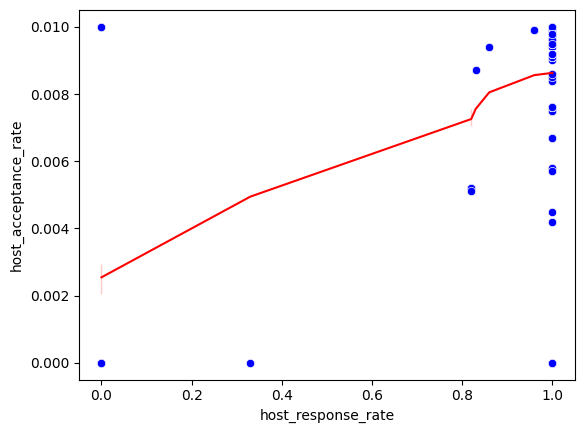

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=filtro1)
#sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=filtro1)

sns.lineplot(x='host_response_rate', y='Predicciones', color="red", data=filtro1)

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

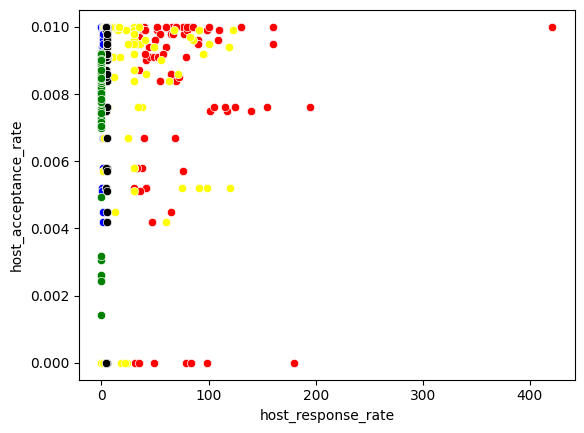

In [ ]:
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=filtro1)
sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=filtro1)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="yellow", data=filtro1)
sns.scatterplot(x='review_scores_rating', y='host_acceptance_rate', color="black", data=filtro1)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="green", data=filtro1)


In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.33297885115141823

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.5770431969544553

##filtro **Private room** “Price” vs availability_365, host_response_rate, number_of_reviews, accommodates“







In [ ]:
filtro2 = españa[españa["room_type"] == "Private room"]
filtro2

In [ ]:
filtro2 = filtro2.replace('sin registro', pd.np.nan)
filtro2

In [ ]:
#filtro2.dropna(inplace=True)
#filtro2

In [ ]:
filtro2['host_acceptance_rate'] = filtro2['host_acceptance_rate'].replace('%', '', regex=True).astype('float') / 100

In [ ]:
filtro2['price'] = filtro2['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [ ]:
filtro2[['host_acceptance_rate',"host_response_rate"]] = filtro2[['host_acceptance_rate',"host_response_rate"]].replace('%', '', regex=True).astype('float') / 100

In [ ]:
filtro2.dropna(subset=['availability_365', 'host_response_rate','number_of_reviews',"accommodates"], inplace=True)

In [ ]:
filtro2["number_of_reviews"]

<Axes: xlabel='availability_365', ylabel='price'>

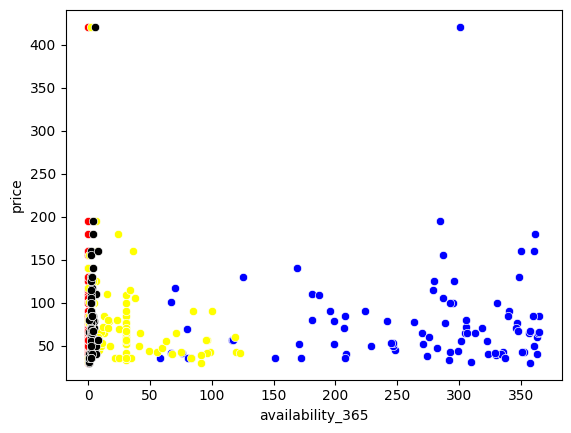

In [ ]:
from turtle import color


sns.scatterplot(x='availability_365', y='price', color="blue", data=filtro2)
sns.scatterplot(x='host_response_rate', y='price', color="red", data=filtro2)
sns.scatterplot(x='number_of_reviews', y='price', color="yellow", data=filtro2)
sns.scatterplot(x='accommodates', y='price', color="black", data=filtro2)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= filtro2[['availability_365', 'host_response_rate','number_of_reviews',"accommodates"]]
Var_Dep= filtro2['price']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365', 'host_response_rate', 'number_of_reviews',
        'accommodates'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 7.94686266e-02,  4.33771005e+05, -7.07170156e-01,  9.05949238e+00]),
 'rank_': 4,
 'singular_': array([8.79170952e+02, 2.96991152e+02, 1.51979390e+01, 2.54569314e-04]),
 'intercept_': 14.03401137950788}

**Modelo matemático: y= 0.62534291x1 + 0.01978015x2 + 0.81582765x3 + 1.2098448339476615**

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.25322377361467696

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=filtro2[['availability_365', 'host_response_rate','number_of_reviews',"accommodates"]])
y_pred

array([ 59.21287552,  55.51004   ,  88.87378466,  97.14663826,
        96.4394681 ,  99.81638163, 100.85859641,  40.81054987,
       106.49037592,  90.57481576,  22.76001031,  54.31015649,
        75.7358106 ,  54.97790207,  72.47426964,  68.1067535 ,
        60.25590359,  58.5670843 ,  38.3429443 ,  76.61003443,
        75.41793609,  78.83508704, 101.14313689,  79.70924193,
        84.95424023,  75.66956774,  13.68137729, 115.54433524,
        68.82204008,  42.51943507,  75.14572996,  47.72877801,
        98.2983613 ,  51.96583282,  74.94112433,  83.81502257,
        45.02785091,  99.09972471,  81.53702034,  98.39392489,
        38.74889214,  37.40225924,  91.76798924,  69.87273542,
        91.36145454,  97.7893596 ,  79.47328154,  80.14732449,
        90.1523929 , 107.07927932,  71.46512657,  73.65805818,
        97.63042235,  94.80978921, 112.05461907,  78.35827528,
        62.75080766, 106.80831937,  96.6928938 ,  94.9526315 ,
        93.10882706, 105.44464051,  69.7756636 ,  -6.12

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
filtro2.insert(0, 'Predicciones', y_pred)
filtro2

,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,59.212876,0,https://www.airbnb.com/rooms/14551,31/03/2023,city scrape,Cozy & Colorful by Nature (Private Room),Up in the hill of Montjuïc (a mountain overloo...,Montjuïc is most likely the best neighborhood ...,https://a0.muscache.com/pictures/16209908/f1fe...,https://www.airbnb.com/users/show/57237,...,4.94,4.89,4.91,4.63,4.74,1.0,0.0,0.0,0.0,0.37
1,55.510040,1,https://www.airbnb.com/rooms/1205757,31/03/2023,city scrape,Habitación doble + baño y terraza,<b>The space</b><br />Habitación confortable e...,Bonitas playas a 15 minutos en coche. Piscina ...,https://a0.muscache.com/pictures/02e0a61e-078e...,https://www.airbnb.com/users/show/6586355,...,4.85,4.85,4.91,4.69,4.80,1.0,0.0,0.0,0.0,0.51
3,88.873785,3,https://www.airbnb.com/rooms/751638,31/03/2023,city scrape,Room Limon - Casa Pati de l´Albera,<b>The space</b><br />Nice room with 2 individ...,"Sant Climent is a tiny village, with a populat...",https://a0.muscache.com/pictures/64276178/98d1...,https://www.airbnb.com/users/show/3680160,...,4.50,4.86,5.00,4.63,4.50,6.0,1.0,0.0,0.0,0.08
12,97.146638,12,https://www.airbnb.com/rooms/755927,31/03/2023,city scrape,Room Oliva - Casa Pati de l´Albera,"<b>The space</b><br />Wide double room, ground...","Sant Climent is a tiny village, with a populat...",https://a0.muscache.com/pictures/9eeac113-fa97...,https://www.airbnb.com/users/show/3680160,...,4.50,5.00,5.00,4.70,4.90,6.0,1.0,0.0,0.0,0.09
13,96.439468,13,https://www.airbnb.com/rooms/756145,31/03/2023,city scrape,Room Abeto - Casa Pati de l´Albera,Inside the rural house El Pati de l'Albera is ...,"Sant Climent is a tiny village, with a populat...",https://a0.muscache.com/pictures/64276036/162f...,https://www.airbnb.com/users/show/3680160,...,4.55,4.82,4.82,4.36,4.45,6.0,1.0,0.0,0.0,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,71.924247,1462,https://www.airbnb.com/rooms/9103239,01/04/2023,city scrape,Mas La Coma 1,Casa de campo del S.XVI. <br />Masia de tres p...,La casa está situada en medio de la naturaleza...,https://a0.muscache.com/pictures/e334e86f-2df8...,https://www.airbnb.com/users/show/46457505,...,4.84,4.95,4.96,4.88,4.78,3.0,0.0,0.0,0.0,1.06
1474,117.616190,1473,https://www.airbnb.com/rooms/9155731,01/04/2023,city scrape,Mas La Coma 3,Casa de campo del S.XVI. <br />Masia de tres p...,La casa está situada en medio de la naturaleza...,https://a0.muscache.com/pictures/dbcdcb92-d32a...,https://www.airbnb.com/users/show/46457505,...,4.77,4.98,4.96,4.92,4.82,3.0,0.0,0.0,0.0,0.30
1486,69.114024,1485,https://www.airbnb.com/rooms/10607075,31/03/2023,city scrape,APARTAMENTO en HOTEL FAMILIAR,"Situado en una zona rural, cerca del Pueblo de...",NaN,https://a0.muscache.com/pictures/43c05d00-fd39...,https://www.airbnb.com/users/show/5842034,...,5.00,5.00,5.00,4.80,5.00,2.0,0.0,0.0,0.0,0.01
1501,58.153291,1500,https://www.airbnb.com/rooms/9262701,01/04/2023,city scrape,Center room next to old town,""" Habitación doble en el corazón de Girona, c...",NaN,https://a0.muscache.com/pictures/dc45c8fb-6bde...,https://www.airbnb.com/users/show/48118501,...,4.89,4.90,4.92,4.92,4.78,2.0,0.0,0.0,0.0,0.30


In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

#sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=filtro1)
#sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=filtro1)

#sns.lineplot(x='host_response_rate', y='Predicciones', color="red", data=filtro1)

<Axes: xlabel='number_of_reviews', ylabel='price'>

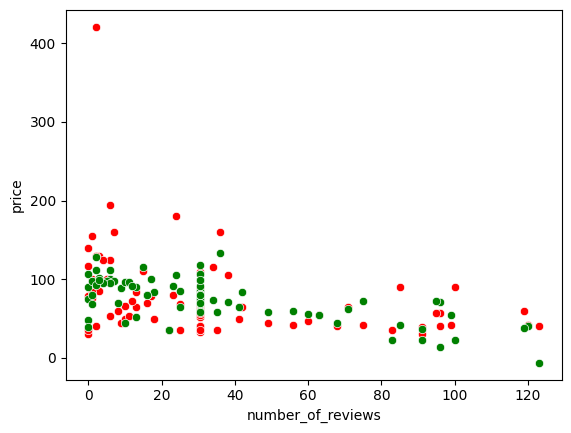

In [ ]:
#sns.scatterplot(x='availability_365', y='price', color="blue", data=filtro2)
sns.scatterplot(x='number_of_reviews', y='price', color="red", data=filtro2)
#sns.scatterplot(x='number_of_reviews', y='price', color="yellow", data=filtro2)
#sns.scatterplot(x='accommodates', y='price', color="black", data=filtro2)
sns.scatterplot(x='number_of_reviews', y='Predicciones', color="green", data=filtro2)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.25322377361467696

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.5032134473706729

##filtro **Private room** “host_acceptance_rate vs number_of_reviews,review_scores_cleanliness,review_scores_communication ”








In [ ]:
filtro3 = españa[españa["room_type"] == "Private room"]

In [ ]:
filtro3 = filtro3.replace('sin registro', pd.np.nan)

<ipython-input-405-78784c3836ad>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  filtro3 = filtro3.replace('sin registro', pd.np.nan)


In [ ]:
filtro3['host_acceptance_rate'] = filtro3['host_acceptance_rate'].replace('%', '', regex=True).astype('float') / 100

In [ ]:
filtro3['price'] = filtro3['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [ ]:
filtro3[['host_acceptance_rate',"host_response_rate"]] = filtro3[['host_acceptance_rate',"host_response_rate"]].replace('%', '', regex=True).astype('float') / 100

In [ ]:
#filtro3.dropna(inplace=True)

In [ ]:
filtro3.dropna(subset=['number_of_reviews', 'review_scores_cleanliness','review_scores_communication',"host_acceptance_rate"], inplace=True)

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

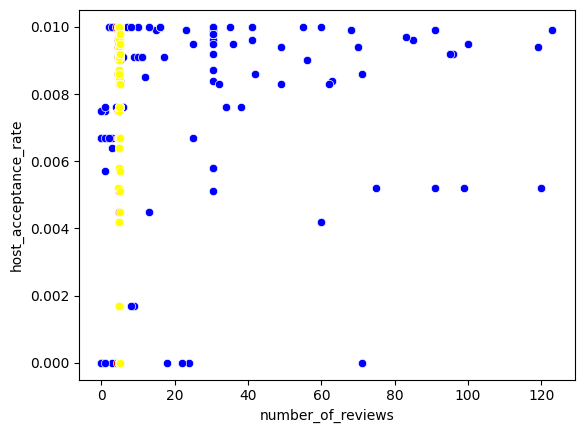

In [ ]:
from turtle import color


sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=filtro3)
sns.scatterplot(x='review_scores_cleanliness', y='host_acceptance_rate', color="red", data=filtro3)
sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="yellow", data=filtro3)
#sns.scatterplot(x='accommodates', y='host_acceptance_rate', color="black", data=filtro3)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= filtro3[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']]
Var_Dep= filtro3['host_acceptance_rate']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'review_scores_cleanliness',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 2.02018221e-05, -1.91912732e-03,  5.49523820e-03]),
 'rank_': 3,
 'singular_': array([318.79516839,   1.97548584,   0.86796869]),
 'intercept_': -0.010480707464140622}

**Modelo matemático: y= 0.62534291x1 + 0.01978015x2 + 0.81582765x3 + 1.2098448339476615**

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.05572646132516368

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=filtro3[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']])
y_pred

array([0.00815173, 0.00840525, 0.00854123, 0.00856143, 0.00749653,
       0.00658687, 0.00721473, 0.008258  , 0.00861112, 0.00836394,
       0.00706845, 0.00710625, 0.00810387, 0.00794033, 0.00840376,
       0.00628034, 0.00720482, 0.00768604, 0.00753425, 0.00755897,
       0.00761392, 0.00798199, 0.00825193, 0.00976904, 0.00771775,
       0.00746217, 0.00749007, 0.00746045, 0.00780322, 0.00833513,
       0.00782419, 0.00785901, 0.00880543, 0.00706704, 0.00706845,
       0.00763396, 0.00876463, 0.00706845, 0.00706845, 0.00706845,
       0.00746045, 0.00706845, 0.00687052, 0.00810281, 0.00795034,
       0.00809801, 0.00866445, 0.00798569, 0.00784506, 0.0081085 ,
       0.00754126, 0.00891552, 0.00823352, 0.00713233, 0.00663834,
       0.00742005, 0.00813312, 0.00708865, 0.00706845, 0.00706845,
       0.00769129, 0.00776486, 0.00742005, 0.00674826, 0.00784731,
       0.0078093 , 0.00868767, 0.0079428 , 0.00746045, 0.00658663,
       0.00744025, 0.00797456, 0.00765577, 0.00991351, 0.00768

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
filtro3.insert(0, 'Predicciones', y_pred)
filtro3

,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0.008152,0,https://www.airbnb.com/rooms/14551,31/03/2023,city scrape,Cozy & Colorful by Nature (Private Room),Up in the hill of Montjuïc (a mountain overloo...,Montjuïc is most likely the best neighborhood ...,https://a0.muscache.com/pictures/16209908/f1fe...,https://www.airbnb.com/users/show/57237,...,4.94,4.89,4.91,4.63,4.74,1.0,0.0,0.0,0.0,0.37
1,0.008405,1,https://www.airbnb.com/rooms/1205757,31/03/2023,city scrape,Habitación doble + baño y terraza,<b>The space</b><br />Habitación confortable e...,Bonitas playas a 15 minutos en coche. Piscina ...,https://a0.muscache.com/pictures/02e0a61e-078e...,https://www.airbnb.com/users/show/6586355,...,4.85,4.85,4.91,4.69,4.80,1.0,0.0,0.0,0.0,0.51
3,0.008541,3,https://www.airbnb.com/rooms/751638,31/03/2023,city scrape,Room Limon - Casa Pati de l´Albera,<b>The space</b><br />Nice room with 2 individ...,"Sant Climent is a tiny village, with a populat...",https://a0.muscache.com/pictures/64276178/98d1...,https://www.airbnb.com/users/show/3680160,...,4.50,4.86,5.00,4.63,4.50,6.0,1.0,0.0,0.0,0.08
12,0.008561,12,https://www.airbnb.com/rooms/755927,31/03/2023,city scrape,Room Oliva - Casa Pati de l´Albera,"<b>The space</b><br />Wide double room, ground...","Sant Climent is a tiny village, with a populat...",https://a0.muscache.com/pictures/9eeac113-fa97...,https://www.airbnb.com/users/show/3680160,...,4.50,5.00,5.00,4.70,4.90,6.0,1.0,0.0,0.0,0.09
13,0.007497,13,https://www.airbnb.com/rooms/756145,31/03/2023,city scrape,Room Abeto - Casa Pati de l´Albera,Inside the rural house El Pati de l'Albera is ...,"Sant Climent is a tiny village, with a populat...",https://a0.muscache.com/pictures/64276036/162f...,https://www.airbnb.com/users/show/3680160,...,4.55,4.82,4.82,4.36,4.45,6.0,1.0,0.0,0.0,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,0.009406,1462,https://www.airbnb.com/rooms/9103239,01/04/2023,city scrape,Mas La Coma 1,Casa de campo del S.XVI. <br />Masia de tres p...,La casa está situada en medio de la naturaleza...,https://a0.muscache.com/pictures/e334e86f-2df8...,https://www.airbnb.com/users/show/46457505,...,4.84,4.95,4.96,4.88,4.78,3.0,0.0,0.0,0.0,1.06
1474,0.008238,1473,https://www.airbnb.com/rooms/9155731,01/04/2023,city scrape,Mas La Coma 3,Casa de campo del S.XVI. <br />Masia de tres p...,La casa está situada en medio de la naturaleza...,https://a0.muscache.com/pictures/dbcdcb92-d32a...,https://www.airbnb.com/users/show/46457505,...,4.77,4.98,4.96,4.92,4.82,3.0,0.0,0.0,0.0,0.30
1486,0.007420,1485,https://www.airbnb.com/rooms/10607075,31/03/2023,city scrape,APARTAMENTO en HOTEL FAMILIAR,"Situado en una zona rural, cerca del Pueblo de...",NaN,https://a0.muscache.com/pictures/43c05d00-fd39...,https://www.airbnb.com/users/show/5842034,...,5.00,5.00,5.00,4.80,5.00,2.0,0.0,0.0,0.0,0.01
1501,0.007787,1500,https://www.airbnb.com/rooms/9262701,01/04/2023,city scrape,Center room next to old town,""" Habitación doble en el corazón de Girona, c...",NaN,https://a0.muscache.com/pictures/dc45c8fb-6bde...,https://www.airbnb.com/users/show/48118501,...,4.89,4.90,4.92,4.92,4.78,2.0,0.0,0.0,0.0,0.30


In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

#sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=filtro1)
#sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=filtro1)

#sns.lineplot(x='host_response_rate', y='Predicciones', color="red", data=filtro1)

<Axes: xlabel='review_scores_cleanliness', ylabel='host_acceptance_rate'>

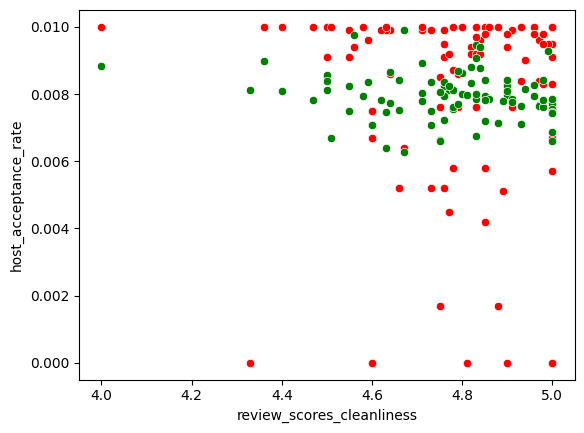

In [ ]:
#sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=filtro3)
sns.scatterplot(x='review_scores_cleanliness', y='host_acceptance_rate', color="red", data=filtro3)
#sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="yellow", data=filtro3)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones', color="green", data=filtro3)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.05572646132516368

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.23606452788414375

#**Entire home/apt** 

##USA

In [ ]:
california= pd.read_csv("Datos_limpios_DSV_california.csv")
california.head(2)

,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,https://www.airbnb.com/rooms/958,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,https://www.airbnb.com/users/show/1169,Holly,...,4.92,4.95,4.88,4.98,4.76,1.0,1.0,0.0,0.0,2.31
1,1,https://www.airbnb.com/rooms/5858,06/03/2023,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,https://www.airbnb.com/users/show/8904,Philip And Tania,...,4.87,4.89,4.85,4.77,4.68,1.0,1.0,0.0,0.0,0.66


##filtro **Entire home/apt**  “host_acceptance_rate vs host_response_rate, Price, number_of_reviews , review_scores_rating”






In [ ]:
filtro1 = california[california["room_type"] == "Entire home/apt"]

In [ ]:
filtro1 = filtro1.replace('sin registro', pd.np.nan)

<ipython-input-547-145afc511beb>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  filtro1 = filtro1.replace('sin registro', pd.np.nan)


In [ ]:
filtro1.dropna(inplace=True)

In [ ]:
filtro1['host_acceptance_rate'] = filtro1['host_acceptance_rate'].replace('%', '', regex=True).astype('float') / 100

In [ ]:
filtro1['price'] = filtro1['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [ ]:
filtro1[['host_acceptance_rate',"host_response_rate"]] = filtro1[['host_acceptance_rate',"host_response_rate"]].replace('%', '', regex=True).astype('float') / 100

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

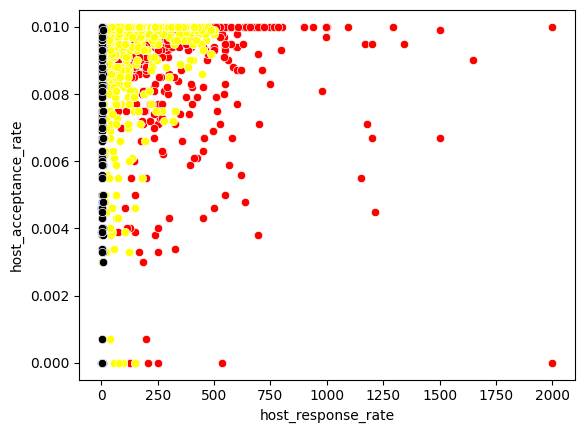

In [ ]:
from turtle import color
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=filtro1)
sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=filtro1)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="yellow", data=filtro1)
sns.scatterplot(x='review_scores_rating', y='host_acceptance_rate', color="black", data=filtro1)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= filtro1[['host_response_rate', 'price','number_of_reviews',"review_scores_rating"]]
Var_Dep= filtro1['host_acceptance_rate']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate', 'price', 'number_of_reviews',
        'review_scores_rating'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 1.06919621e-02, -4.81126923e-07,  2.48605791e-06, -6.54711895e-04]),
 'rank_': 4,
 'singular_': array([6.04136195e+03, 2.59345028e+03, 3.10512316e+00, 1.36607370e+00]),
 'intercept_': 0.001467355166653696}

**Modelo matemático: y= 0.62534291x1 + 0.01978015x2 + 0.81582765x3 + 1.2098448339476615**

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.18334464702846232

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=filtro1[['host_response_rate', 'price','number_of_reviews',"review_scores_rating"]])
y_pred

array([0.00982584, 0.00940181, 0.0089187 , 0.00557649, 0.00959291,
       0.00934573, 0.00906561, 0.00900557, 0.0096407 , 0.00370829,
       0.00964006, 0.00910058, 0.00917671, 0.00879428, 0.00874921,
       0.00930574, 0.00878531, 0.00883905, 0.00866701, 0.00894497,
       0.00990499, 0.00967975, 0.00878104, 0.00873836, 0.00907445,
       0.00883845, 0.00893209, 0.00934615, 0.00909964, 0.00919909,
       0.00917167, 0.00901788, 0.00887966, 0.00989815, 0.00806625,
       0.00740233, 0.00886902, 0.00541431, 0.0096887 , 0.00886211,
       0.00919963, 0.00894654, 0.00622352, 0.01000573, 0.00879071,
       0.00895656, 0.01000322, 0.0101739 , 0.00929143, 0.01001333,
       0.00965912, 0.00910757, 0.00965884, 0.00923256, 0.00927286,
       0.00936042, 0.0096033 , 0.00908956, 0.00980321, 0.00895037,
       0.0091379 , 0.00912763, 0.00885059, 0.00965004, 0.00913036,
       0.00932472, 0.00918099, 0.00989104, 0.00875136, 0.0094691 ,
       0.00962146, 0.00894331, 0.00916234, 0.00874238, 0.00926

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
filtro1.insert(0, 'Predicciones', y_pred)
filtro1

,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0.009826,0,https://www.airbnb.com/rooms/958,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,https://www.airbnb.com/users/show/1169,...,4.92,4.95,4.88,4.98,4.76,1.0,1.0,0.0,0.0,2.31
5,0.009402,5,https://www.airbnb.com/rooms/142177,06/03/2023,city scrape,"Stylish, Spacious and Quiet Flat!",***Will consider small pets. One pet per stay...,Experience the real San Francisco and stay whe...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/656263,...,4.88,4.95,4.97,4.78,4.80,1.0,1.0,0.0,0.0,1.69
8,0.008919,8,https://www.airbnb.com/rooms/491867,06/03/2023,city scrape,Central San Francisco Urban Dream,3 BR/2 BA Victorian flat beautifully restored ...,"Nearby market: Right out the front door, righ...",https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/969518,...,4.86,4.98,4.91,4.91,4.75,1.0,1.0,0.0,0.0,0.44
12,0.005576,12,https://www.airbnb.com/rooms/493889,06/03/2023,city scrape,Spacious 1brm w/ breathtaking view,This is apartment is the best home away from h...,We are the quiet but with all the conveniences...,https://a0.muscache.com/pictures/6a6f1887-5ef2...,https://www.airbnb.com/users/show/2439917,...,4.69,4.83,4.97,4.78,4.72,1.0,1.0,0.0,0.0,0.78
14,0.009593,14,https://www.airbnb.com/rooms/494111,06/03/2023,city scrape,Comfortable space of your own in SF,"<b>The space</b><br />A beautiful, bright, and...",The location is not considered a traditionally...,https://a0.muscache.com/pictures/a4c0e7ec-caa1...,https://www.airbnb.com/users/show/252927,...,4.74,4.92,4.92,4.67,4.65,2.0,2.0,0.0,0.0,1.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2034,0.008817,2034,https://www.airbnb.com/rooms/21186680,06/03/2023,city scrape,Hayes Valley Haven - sunny and quiet with kitt...,This apartment is in an original Victorian on ...,Hayes Valley is fab. It is is arguably the mos...,https://a0.muscache.com/pictures/cf23e821-d554...,https://www.airbnb.com/users/show/152997097,...,4.88,5.00,5.00,4.97,4.70,2.0,1.0,1.0,0.0,0.53
2035,0.009403,2035,https://www.airbnb.com/rooms/20933318,06/03/2023,city scrape,Charming Guest Room in 1907 Cottage on Russian...,"Begin a relaxing morning out on the porch, the...",The home is located in an eclectic neighborhoo...,https://a0.muscache.com/pictures/5d110d0e-3593...,https://www.airbnb.com/users/show/49425233,...,4.96,4.98,4.97,4.95,4.78,1.0,1.0,0.0,0.0,3.71
2036,0.009431,2036,https://www.airbnb.com/rooms/21187925,06/03/2023,city scrape,"Chic, sun-drenched studio w/views and parking.","Stunning, retro-chic, sun-drenched studio.<br ...",The Bayview is a secret gem in San Francisco. ...,https://a0.muscache.com/pictures/a1a3be61-cb58...,https://www.airbnb.com/users/show/5611653,...,4.99,4.98,4.98,4.69,4.80,2.0,2.0,0.0,0.0,3.59
2046,0.009277,2046,https://www.airbnb.com/rooms/21233544,06/03/2023,city scrape,Ocean Beach Guest Suite,Ground level suite with plenty of natural ligh...,The location is a block from Ocean Beach in Sa...,https://a0.muscache.com/pictures/e0130695-0d00...,https://www.airbnb.com/users/show/1852503,...,4.99,4.99,4.99,4.89,4.93,1.0,1.0,0.0,0.0,2.67


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

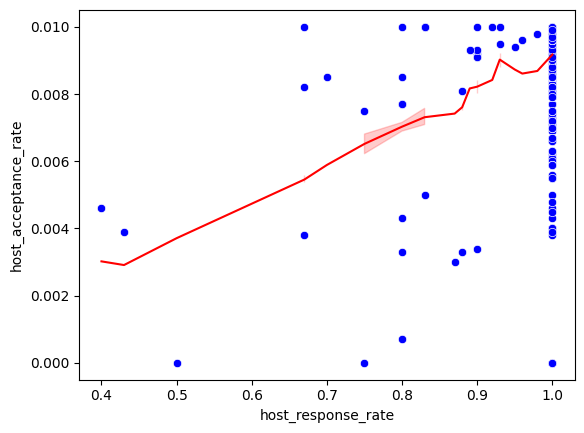

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=filtro1)
#sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=filtro1)

sns.lineplot(x='host_response_rate', y='Predicciones', color="red", data=filtro1)

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

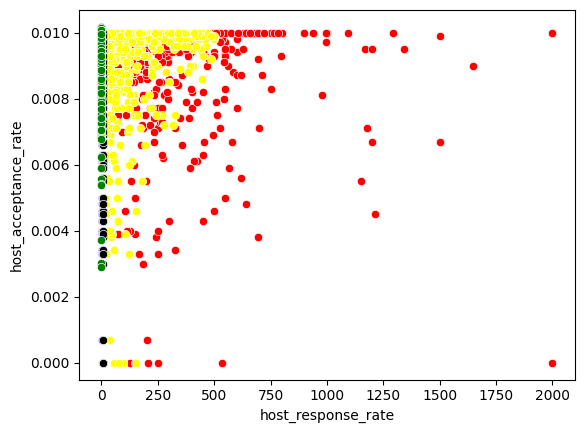

In [ ]:
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=filtro1)
sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=filtro1)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="yellow", data=filtro1)
sns.scatterplot(x='review_scores_rating', y='host_acceptance_rate', color="black", data=filtro1)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="green", data=filtro1)


In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.18334464702846232

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.4281876306345879

##filtro **Entire home/apt** “Price” vs availability_365, host_response_rate, number_of_reviews, accommodates“







In [ ]:
filtro2 = california[california["room_type"] == "Entire home/apt"]

In [ ]:
filtro2 = filtro2.replace('sin registro', pd.np.nan)

<ipython-input-566-a0535f04630e>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  filtro2 = filtro2.replace('sin registro', pd.np.nan)


In [ ]:
filtro2.dropna(inplace=True)

In [ ]:
filtro2['host_acceptance_rate'] = filtro2['host_acceptance_rate'].replace('%', '', regex=True).astype('float') / 100

In [ ]:
filtro2['price'] = filtro2['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [ ]:
#filtro2['price'] = filtro2['price'].str.replace('$', '').astype(float)

In [ ]:
filtro2[['host_acceptance_rate',"host_response_rate"]] = filtro2[['host_acceptance_rate',"host_response_rate"]].replace('%', '', regex=True).astype('float') / 100

<Axes: xlabel='availability_365', ylabel='price'>

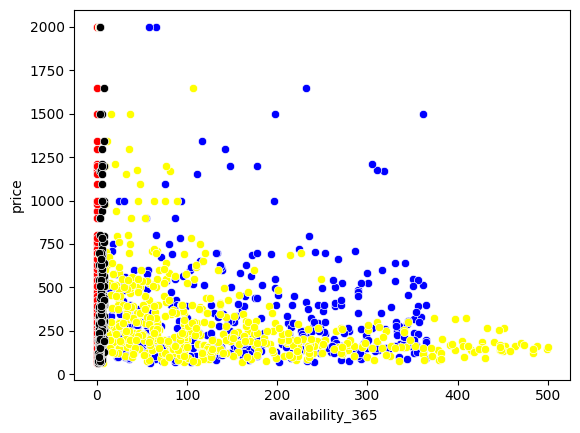

In [ ]:
from turtle import color


sns.scatterplot(x='availability_365', y='price', color="blue", data=filtro2)
sns.scatterplot(x='host_response_rate', y='price', color="red", data=filtro2)
sns.scatterplot(x='number_of_reviews', y='price', color="yellow", data=filtro2)
sns.scatterplot(x='accommodates', y='price', color="black", data=filtro2)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= filtro2[['availability_365', 'host_response_rate','number_of_reviews',"accommodates"]]
Var_Dep= filtro2['price']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365', 'host_response_rate', 'number_of_reviews',
        'accommodates'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 5.48333321e-02,  3.12368920e+04, -5.28203531e-01,  5.41969776e+01]),
 'rank_': 4,
 'singular_': array([2.81958183e+03, 2.56470490e+03, 3.93111868e+01, 1.37288151e-02]),
 'intercept_': -146.17917070173138}

**Modelo matemático: y= 0.62534291x1 + 0.01978015x2 + 0.81582765x3 + 1.2098448339476615**

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.2642912496192158

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=filtro2[['availability_365', 'host_response_rate','number_of_reviews',"accommodates"]])
y_pred

array([133.4973959 , 261.13269984, 407.97907277, 136.92653346,
       282.82447519, 338.18519704, 219.46244554, 492.29130209,
       237.09099828,  91.4761651 , 229.08652916, 560.62987717,
       225.19417821, 588.67885202, 480.17732441, 197.3674341 ,
       471.99258418, 488.12952489, 498.89143173, 441.2823081 ,
       171.13889597, 194.55176656, 603.46162753, 493.67115311,
       469.94644248, 275.76089007, 376.97932925, 186.60415993,
       339.00769702, 220.13155759, 233.43173879, 242.68601113,
       364.49053596, 157.80819993, 256.0350443 , 100.20227312,
       477.24064298, 324.21114156, 119.30297811, 403.63685449,
       297.40868748, 488.20239366, 293.98406832,  33.88393227,
       467.05967865, 355.02732068,  80.51440194, 133.16726374,
       286.90500622,  51.62351901, 129.92188207, 231.39034473,
       314.25942369, 490.0496537 , 389.17985246, 350.76376237,
       173.79264971, 321.50870556, 299.30682732, 319.21545036,
       542.40588953, 364.71219881, 475.51858554, 117.24

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
filtro2.insert(0, 'Predicciones', y_pred)
filtro2

,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,133.497396,0,https://www.airbnb.com/rooms/958,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,https://www.airbnb.com/users/show/1169,...,4.92,4.95,4.88,4.98,4.76,1.0,1.0,0.0,0.0,2.31
5,261.132700,5,https://www.airbnb.com/rooms/142177,06/03/2023,city scrape,"Stylish, Spacious and Quiet Flat!",***Will consider small pets. One pet per stay...,Experience the real San Francisco and stay whe...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/656263,...,4.88,4.95,4.97,4.78,4.80,1.0,1.0,0.0,0.0,1.69
8,407.979073,8,https://www.airbnb.com/rooms/491867,06/03/2023,city scrape,Central San Francisco Urban Dream,3 BR/2 BA Victorian flat beautifully restored ...,"Nearby market: Right out the front door, righ...",https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/969518,...,4.86,4.98,4.91,4.91,4.75,1.0,1.0,0.0,0.0,0.44
12,136.926533,12,https://www.airbnb.com/rooms/493889,06/03/2023,city scrape,Spacious 1brm w/ breathtaking view,This is apartment is the best home away from h...,We are the quiet but with all the conveniences...,https://a0.muscache.com/pictures/6a6f1887-5ef2...,https://www.airbnb.com/users/show/2439917,...,4.69,4.83,4.97,4.78,4.72,1.0,1.0,0.0,0.0,0.78
14,282.824475,14,https://www.airbnb.com/rooms/494111,06/03/2023,city scrape,Comfortable space of your own in SF,"<b>The space</b><br />A beautiful, bright, and...",The location is not considered a traditionally...,https://a0.muscache.com/pictures/a4c0e7ec-caa1...,https://www.airbnb.com/users/show/252927,...,4.74,4.92,4.92,4.67,4.65,2.0,2.0,0.0,0.0,1.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2034,370.975443,2034,https://www.airbnb.com/rooms/21186680,06/03/2023,city scrape,Hayes Valley Haven - sunny and quiet with kitt...,This apartment is in an original Victorian on ...,Hayes Valley is fab. It is is arguably the mos...,https://a0.muscache.com/pictures/cf23e821-d554...,https://www.airbnb.com/users/show/152997097,...,4.88,5.00,5.00,4.97,4.70,2.0,1.0,1.0,0.0,0.53
2035,213.301945,2035,https://www.airbnb.com/rooms/20933318,06/03/2023,city scrape,Charming Guest Room in 1907 Cottage on Russian...,"Begin a relaxing morning out on the porch, the...",The home is located in an eclectic neighborhoo...,https://a0.muscache.com/pictures/5d110d0e-3593...,https://www.airbnb.com/users/show/49425233,...,4.96,4.98,4.97,4.95,4.78,1.0,1.0,0.0,0.0,3.71
2036,213.152019,2036,https://www.airbnb.com/rooms/21187925,06/03/2023,city scrape,"Chic, sun-drenched studio w/views and parking.","Stunning, retro-chic, sun-drenched studio.<br ...",The Bayview is a secret gem in San Francisco. ...,https://a0.muscache.com/pictures/a1a3be61-cb58...,https://www.airbnb.com/users/show/5611653,...,4.99,4.98,4.98,4.69,4.80,2.0,2.0,0.0,0.0,3.59
2046,188.163085,2046,https://www.airbnb.com/rooms/21233544,06/03/2023,city scrape,Ocean Beach Guest Suite,Ground level suite with plenty of natural ligh...,The location is a block from Ocean Beach in Sa...,https://a0.muscache.com/pictures/e0130695-0d00...,https://www.airbnb.com/users/show/1852503,...,4.99,4.99,4.99,4.89,4.93,1.0,1.0,0.0,0.0,2.67


In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

#sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=filtro1)
#sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=filtro1)

#sns.lineplot(x='host_response_rate', y='Predicciones', color="red", data=filtro1)

<Axes: xlabel='number_of_reviews', ylabel='price'>

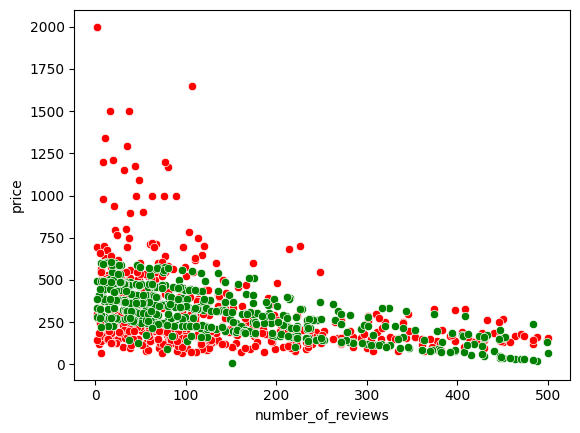

In [ ]:
#sns.scatterplot(x='availability_365', y='price', color="blue", data=filtro2)
sns.scatterplot(x='number_of_reviews', y='price', color="red", data=filtro2)
#sns.scatterplot(x='number_of_reviews', y='price', color="yellow", data=filtro2)
#sns.scatterplot(x='accommodates', y='price', color="black", data=filtro2)
sns.scatterplot(x='number_of_reviews', y='Predicciones', color="green", data=filtro2)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.2642912496192158

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.5140926469219491

##filtro **Entire home/apt** “host_acceptance_rate vs number_of_reviews,review_scores_cleanliness,review_scores_communication ”








In [ ]:
filtro3 = california[california["room_type"] == "Entire home/apt"]

In [ ]:
filtro3 = filtro3.replace('sin registro', pd.np.nan)

<ipython-input-597-78784c3836ad>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  filtro3 = filtro3.replace('sin registro', pd.np.nan)


In [ ]:
filtro3['host_acceptance_rate'] = filtro3['host_acceptance_rate'].replace('%', '', regex=True).astype('float') / 100

In [ ]:
filtro3['price'] = filtro3['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
filtro3.dropna(inplace=True)

In [ ]:
filtro3[['host_acceptance_rate',"host_response_rate"]] = filtro3[['host_acceptance_rate',"host_response_rate"]].replace('%', '', regex=True).astype('float') / 100

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

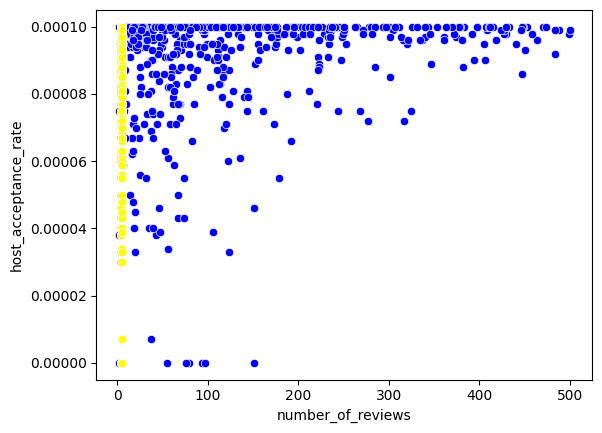

In [ ]:
from turtle import color


sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=filtro3)
sns.scatterplot(x='review_scores_cleanliness', y='host_acceptance_rate', color="red", data=filtro3)
sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="yellow", data=filtro3)
#sns.scatterplot(x='accommodates', y='host_acceptance_rate', color="black", data=filtro3)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= filtro3[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']]
Var_Dep= filtro3['host_acceptance_rate']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'review_scores_cleanliness',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 3.37441257e-08, -3.91976339e-06,  1.25629917e-05]),
 'rank_': 3,
 'singular_': array([2.81948222e+03, 3.75758711e+00, 1.60744949e+00]),
 'intercept_': 4.26164582112949e-05}

**Modelo matemático: y= 0.62534291x1 + 0.01978015x2 + 0.81582765x3 + 1.2098448339476615**

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.05543248451042915

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=filtro3[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']])
y_pred

array([9.75626218e-05, 9.38222068e-05, 8.71403682e-05, 9.01127373e-05,
       9.33378946e-05, 8.88079652e-05, 8.92716660e-05, 8.87015265e-05,
       8.46388907e-05, 8.84270398e-05, 9.74458331e-05, 8.97327453e-05,
       8.99840052e-05, 8.63037790e-05, 8.69814959e-05, 9.12984113e-05,
       8.70178235e-05, 8.60248015e-05, 8.68929818e-05, 8.81156081e-05,
       9.90587720e-05, 9.39481429e-05, 8.55460708e-05, 8.70824934e-05,
       8.87897381e-05, 8.69475169e-05, 8.66751796e-05, 8.96351561e-05,
       8.97214975e-05, 8.99053047e-05, 8.84075584e-05, 8.91849659e-05,
       8.70438171e-05, 1.00878336e-04, 8.88170412e-05, 9.33041505e-05,
       8.88159469e-05, 8.84987236e-05, 9.57900223e-05, 8.95120704e-05,
       9.18157667e-05, 8.86613058e-05, 8.78443296e-05, 1.01521035e-04,
       8.71849837e-05, 8.78650689e-05, 9.90933756e-05, 1.01335236e-04,
       9.17767683e-05, 9.99797830e-05, 9.42437674e-05, 8.88553108e-05,
       9.36187386e-05, 8.92047347e-05, 9.23465254e-05, 9.40406336e-05,
      

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
filtro3.insert(0, 'Predicciones', y_pred)
filtro3

,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0.000098,0,https://www.airbnb.com/rooms/958,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,https://www.airbnb.com/users/show/1169,...,4.92,4.95,4.88,4.98,4.76,1.0,1.0,0.0,0.0,2.31
5,0.000094,5,https://www.airbnb.com/rooms/142177,06/03/2023,city scrape,"Stylish, Spacious and Quiet Flat!",***Will consider small pets. One pet per stay...,Experience the real San Francisco and stay whe...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/656263,...,4.88,4.95,4.97,4.78,4.80,1.0,1.0,0.0,0.0,1.69
8,0.000087,8,https://www.airbnb.com/rooms/491867,06/03/2023,city scrape,Central San Francisco Urban Dream,3 BR/2 BA Victorian flat beautifully restored ...,"Nearby market: Right out the front door, righ...",https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/969518,...,4.86,4.98,4.91,4.91,4.75,1.0,1.0,0.0,0.0,0.44
12,0.000090,12,https://www.airbnb.com/rooms/493889,06/03/2023,city scrape,Spacious 1brm w/ breathtaking view,This is apartment is the best home away from h...,We are the quiet but with all the conveniences...,https://a0.muscache.com/pictures/6a6f1887-5ef2...,https://www.airbnb.com/users/show/2439917,...,4.69,4.83,4.97,4.78,4.72,1.0,1.0,0.0,0.0,0.78
14,0.000093,14,https://www.airbnb.com/rooms/494111,06/03/2023,city scrape,Comfortable space of your own in SF,"<b>The space</b><br />A beautiful, bright, and...",The location is not considered a traditionally...,https://a0.muscache.com/pictures/a4c0e7ec-caa1...,https://www.airbnb.com/users/show/252927,...,4.74,4.92,4.92,4.67,4.65,2.0,2.0,0.0,0.0,1.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2034,0.000087,2034,https://www.airbnb.com/rooms/21186680,06/03/2023,city scrape,Hayes Valley Haven - sunny and quiet with kitt...,This apartment is in an original Victorian on ...,Hayes Valley is fab. It is is arguably the mos...,https://a0.muscache.com/pictures/cf23e821-d554...,https://www.airbnb.com/users/show/152997097,...,4.88,5.00,5.00,4.97,4.70,2.0,1.0,1.0,0.0,0.53
2035,0.000094,2035,https://www.airbnb.com/rooms/20933318,06/03/2023,city scrape,Charming Guest Room in 1907 Cottage on Russian...,"Begin a relaxing morning out on the porch, the...",The home is located in an eclectic neighborhoo...,https://a0.muscache.com/pictures/5d110d0e-3593...,https://www.airbnb.com/users/show/49425233,...,4.96,4.98,4.97,4.95,4.78,1.0,1.0,0.0,0.0,3.71
2036,0.000094,2036,https://www.airbnb.com/rooms/21187925,06/03/2023,city scrape,"Chic, sun-drenched studio w/views and parking.","Stunning, retro-chic, sun-drenched studio.<br ...",The Bayview is a secret gem in San Francisco. ...,https://a0.muscache.com/pictures/a1a3be61-cb58...,https://www.airbnb.com/users/show/5611653,...,4.99,4.98,4.98,4.69,4.80,2.0,2.0,0.0,0.0,3.59
2046,0.000091,2046,https://www.airbnb.com/rooms/21233544,06/03/2023,city scrape,Ocean Beach Guest Suite,Ground level suite with plenty of natural ligh...,The location is a block from Ocean Beach in Sa...,https://a0.muscache.com/pictures/e0130695-0d00...,https://www.airbnb.com/users/show/1852503,...,4.99,4.99,4.99,4.89,4.93,1.0,1.0,0.0,0.0,2.67


In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

#sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=filtro1)
#sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=filtro1)

#sns.lineplot(x='host_response_rate', y='Predicciones', color="red", data=filtro1)

<Axes: xlabel='review_scores_cleanliness', ylabel='host_acceptance_rate'>

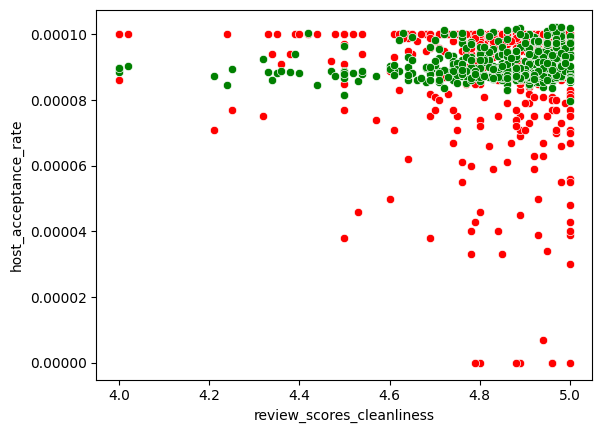

In [ ]:
#sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=filtro3)
sns.scatterplot(x='review_scores_cleanliness', y='host_acceptance_rate', color="red", data=filtro3)
#sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="yellow", data=filtro3)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones', color="green", data=filtro3)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.05543248451042915

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.23544104253598

##MEX

In [ ]:
mex= pd.read_csv("Datos_limpios_IQR_mexico.csv")
mex.head(2)

,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,https://www.airbnb.com/rooms/2056638,30/03/23,city scrape,Amplio y luminoso loft en CoyoacÃ¡n,CÃ³modo loft de dos pisos magnÃ­ficamente ubic...,sin registro,https://a0.muscache.com/pictures/28353712/4379...,https://www.airbnb.com/users/show/10531228,Maria,...,4.95,5.00,4.95,5.00,4.86,3.0,3.0,0.0,0.0,0.19
1,1,https://www.airbnb.com/rooms/2072354,30/03/23,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,https://www.airbnb.com/users/show/16840050,MÃ³nica,...,4.88,4.93,5.00,4.95,4.84,2.0,2.0,0.0,0.0,0.54


In [ ]:
#from scipy import stats
#import numpy as np

#mex = mex[(np.abs(stats.zscore(mex.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

In [ ]:
mex

,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,https://www.airbnb.com/rooms/2056638,30/03/23,city scrape,Amplio y luminoso loft en CoyoacÃ¡n,CÃ³modo loft de dos pisos magnÃ­ficamente ubic...,sin registro,https://a0.muscache.com/pictures/28353712/4379...,https://www.airbnb.com/users/show/10531228,Maria,...,4.95,5.00,4.95,5.00,4.86,3.0,3.0,0.0,0.0,0.19
1,1,https://www.airbnb.com/rooms/2072354,30/03/23,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,https://www.airbnb.com/users/show/16840050,MÃ³nica,...,4.88,4.93,5.00,4.95,4.84,2.0,2.0,0.0,0.0,0.54
2,2,https://www.airbnb.com/rooms/696037,29/03/23,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,https://www.airbnb.com/users/show/3531879,Gonzalo & Sandra,...,4.71,4.92,4.92,4.90,4.71,3.0,3.0,0.0,0.0,0.31
3,3,https://www.airbnb.com/rooms/35797,29/03/23,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,https://www.airbnb.com/users/show/153786,Dici,...,4.80,4.90,4.90,4.90,4.80,1.0,1.0,0.0,0.0,1.10
4,4,https://www.airbnb.com/rooms/44616,30/03/23,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,sin registro,https://a0.muscache.com/pictures/251410/ec75fe...,https://www.airbnb.com/users/show/196253,Condesa Haus Bed & Breakfast CDMX,...,4.70,4.87,4.78,4.98,4.80,2.7,3.0,2.0,0.0,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,1869,https://www.airbnb.com/rooms/16113843,29/03/23,city scrape,Casa de Ana MarÃ­a,"2 habitaciones 1 con closet, cama matrimonial ...",Ãreas verdes y comercios,https://a0.muscache.com/pictures/0b8df407-13c9...,https://www.airbnb.com/users/show/105070553,Ana Patricia,...,4.83,5.00,4.92,4.90,4.67,3.0,0.0,3.0,0.0,0.23
1870,1870,https://www.airbnb.com/rooms/15845149,29/03/23,city scrape,"Santa Fe 2 BR Peacefull, Cozy, practical Cotagge","La casa cuenta con dos habitacones, sala, come...",sin registro,https://a0.muscache.com/pictures/7092b53e-016b...,https://www.airbnb.com/users/show/102641023,Gerardo,...,5.00,5.00,5.00,4.80,4.80,3.0,1.0,2.0,0.0,0.08
1871,1871,https://www.airbnb.com/rooms/16496899,30/03/23,city scrape,Apartment in the heart of City,Beautiful newly renovated apartment in Roma No...,"La Colonia Roma is proud to be, along with Con...",https://a0.muscache.com/pictures/42ca04ee-263e...,https://www.airbnb.com/users/show/108354409,Alejandra,...,4.68,4.90,4.90,4.86,4.68,1.0,1.0,0.0,0.0,0.33
1872,1872,https://www.airbnb.com/rooms/16114489,30/03/23,city scrape,Lovely Room next to Polanco,"Very well located, next to Polanco one of the ...",sin registro,https://a0.muscache.com/pictures/f02a8a7d-111d...,https://www.airbnb.com/users/show/66248968,Carolina,...,4.80,4.93,4.80,4.90,4.80,1.0,1.0,0.0,0.0,0.20


##filtro **Entire home/apt**  “host_acceptance_rate vs host_response_rate, Price, number_of_reviews , review_scores_rating”






In [ ]:
filtro1 = mex[mex["room_type"] == "Entire home/apt"]
#filtro1 = filtro1.replace('sin registro', pd.np.nan)
#filtro1.dropna(inplace=True)
#filtro1['price'] = filtro1['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
#filtro1[['host_acceptance_rate',"host_response_rate"]] = filtro1[['host_acceptance_rate',"host_response_rate"]].replace('%', '', regex=True).astype('float') / 100

In [ ]:
filtro1 = filtro1.replace('sin registro', pd.np.nan)


<ipython-input-651-145afc511beb>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  filtro1 = filtro1.replace('sin registro', pd.np.nan)


In [ ]:
filtro1.dropna(inplace=True)

In [ ]:
filtro1['host_acceptance_rate'] = filtro1['host_acceptance_rate'].replace('%', '', regex=True).astype('float') / 100

In [ ]:
filtro1['price'] =filtro1['price'] .replace({"1,089.00":"$1089.00"},regex=False)

In [ ]:
filtro1['price'] = filtro1['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [ ]:
#= filtro1['price'].str.replace('$', '').astype(float)

In [ ]:
filtro1[['host_acceptance_rate',"host_response_rate"]] = filtro1[['host_acceptance_rate',"host_response_rate"]].replace('%', '', regex=True).astype('float') / 100

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

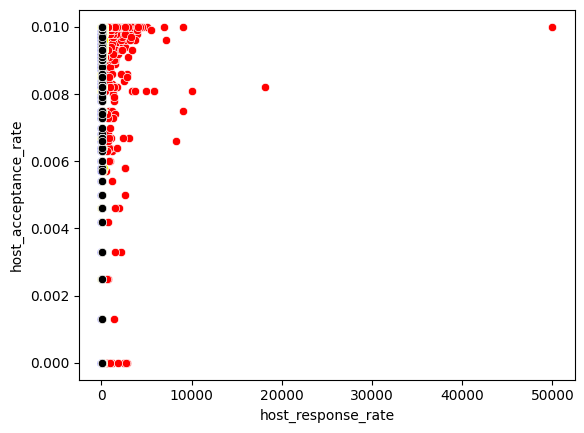

In [ ]:
from turtle import color


sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=filtro1)
sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=filtro1)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="yellow", data=filtro1)
sns.scatterplot(x='review_scores_rating', y='host_acceptance_rate', color="black", data=filtro1)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= filtro1[['host_response_rate', 'price','number_of_reviews',"review_scores_rating"]]
Var_Dep= filtro1['host_acceptance_rate']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate', 'price', 'number_of_reviews',
        'review_scores_rating'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 8.35056076e-03, -4.32494903e-09,  4.19282103e-06, -2.78641433e-04]),
 'rank_': 4,
 'singular_': array([5.70757402e+04, 1.47442270e+03, 2.68216934e+00, 2.29143166e+00]),
 'intercept_': 0.0019231943824060335}

**Modelo matemático: y= 0.62534291x1 + 0.01978015x2 + 0.81582765x3 + 1.2098448339476615**

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.2555790409226284

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=filtro1[['host_response_rate', 'price','number_of_reviews',"review_scores_rating"]])
y_pred

array([0.00915753, 0.00926616, 0.0087798 , 0.00914684, 0.00938165,
       0.00812625, 0.00890772, 0.00927766, 0.00904667, 0.00915399,
       0.00909385, 0.00877864, 0.00926012, 0.00912463, 0.00904456,
       0.00921038, 0.0090515 , 0.00972337, 0.00906402, 0.00908668,
       0.00996664, 0.00816308, 0.00914751, 0.00919735, 0.00925364,
       0.00925654, 0.00911984, 0.00976533, 0.00917611, 0.00921439,
       0.00906281, 0.00981777, 0.00928328, 0.00911112, 0.00888632,
       0.00904306, 0.00902607, 0.00928075, 0.00997717, 0.00900493,
       0.00903603, 0.00912963, 0.00959136, 0.00899287, 0.00886376,
       0.00933206, 0.00952467, 0.0091237 , 0.00934644, 0.00914559,
       0.0096155 , 0.00911253, 0.0094757 , 0.00936508, 0.00979878,
       0.00910413, 0.00927959, 0.00886338, 0.0088686 , 0.0088722 ,
       0.00974793, 0.00992605, 0.00916867, 0.00944492, 0.00912579,
       0.00916608, 0.00927315, 0.00915016, 0.00904621, 0.00920081,
       0.00960484, 0.00938482, 0.00911552, 0.00923982, 0.00909

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
filtro1.insert(0, 'Predicciones', y_pred)
filtro1

,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2,0.009158,2,https://www.airbnb.com/rooms/696037,29/03/23,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,https://www.airbnb.com/users/show/3531879,...,4.71,4.92,4.92,4.90,4.71,3.0,3.0,0.0,0.0,0.31
6,0.009266,6,https://www.airbnb.com/rooms/56074,29/03/23,city scrape,Great space in historical San Rafael,This great apartment is located in one of the ...,Very traditional neighborhood with all service...,https://a0.muscache.com/pictures/3005118/60dac...,https://www.airbnb.com/users/show/265650,...,4.88,4.98,4.94,4.75,4.79,1.0,1.0,0.0,0.0,0.58
9,0.008780,9,https://www.airbnb.com/rooms/728372,29/03/23,city scrape,Casa Indigo in the Center DF groups until 29 Pers,Reformed House from the Art Deco period built ...,"Is located in a very convenient area, I like t...",https://a0.muscache.com/pictures/677b64ac-0c73...,https://www.airbnb.com/users/show/3777702,...,4.69,4.88,4.88,4.90,4.75,6.0,3.0,3.0,0.0,0.95
10,0.009147,10,https://www.airbnb.com/rooms/2083241,30/03/23,city scrape,Condesa Apartment in 1920s Landmarked Art Nouv...,This newly redecorated (after these photos wer...,"Stroll in Parque Mexico and Parque Espana, jus...",https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/8282570,...,4.96,5.00,4.99,4.95,4.91,3.0,3.0,0.0,0.0,2.63
13,0.009382,13,https://www.airbnb.com/rooms/70644,29/03/23,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,https://www.airbnb.com/users/show/212109,...,4.95,4.95,4.98,4.96,4.92,3.0,2.0,1.0,0.0,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1858,0.009323,1858,https://www.airbnb.com/rooms/16107421,30/03/23,city scrape,6. Modern and amazing apartment in Mexico City,- Brillante Depto a pasos de Reforma.<br />- A...,"A pasos de Reforma (Shopping 222), el Ãngel d...",https://a0.muscache.com/pictures/226215ea-6076...,https://www.airbnb.com/users/show/31915089,...,4.68,4.98,4.84,4.88,4.73,2.0,2.0,0.0,0.0,1.33
1859,0.009310,1859,https://www.airbnb.com/rooms/15820435,30/03/23,city scrape,"Celebrate ""DÃ­a de muertos"" @ CDMX (P13)","This pad is the perfect example of the ""DÃ­a d...",A solo unos pasos de la hermosa Plaza de Santo...,https://a0.muscache.com/pictures/b70aba3b-a32e...,https://www.airbnb.com/users/show/4448934,...,4.88,4.90,4.81,4.90,4.73,2.7,1.3,0.0,0.0,1.69
1860,0.009073,1860,https://www.airbnb.com/rooms/15821413,30/03/23,city scrape,"Modern and Cozy apartment very near to ""El ZÃ³...","The top-notch location, decoration, amenities,...",El edificio estÃ¡ a unos pasos de la plaza de ...,https://a0.muscache.com/pictures/de688e87-df8e...,https://www.airbnb.com/users/show/4448934,...,4.98,4.96,4.90,4.90,4.86,2.7,1.3,0.0,0.0,0.93
1863,0.009577,1863,https://www.airbnb.com/rooms/15821898,30/03/23,city scrape,comfortable and cute studio,"Featuring a working table, wifi and DSL cable,...","Condesa is a great neighborhood to be, is safe...",https://a0.muscache.com/pictures/0d205e14-f410...,https://www.airbnb.com/users/show/1497087,...,4.57,4.85,4.77,4.95,4.62,10.0,1.3,0.0,0.0,1.76


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

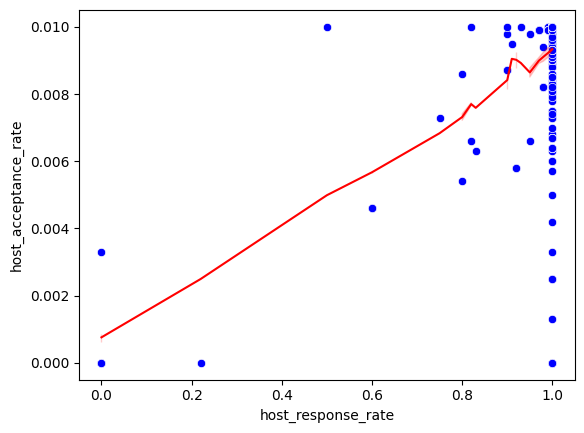

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=filtro1)
#sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=filtro1)

sns.lineplot(x='host_response_rate', y='Predicciones', color="red", data=filtro1)

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

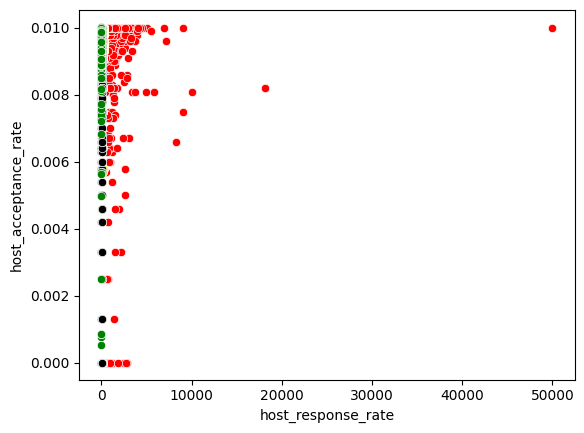

In [ ]:
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=filtro1)
sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=filtro1)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="yellow", data=filtro1)
sns.scatterplot(x='review_scores_rating', y='host_acceptance_rate', color="black", data=filtro1)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="green", data=filtro1)


In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.2555790409226284

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.5055482577584739

##filtro **Entire home/apt** “Price” vs availability_365, host_response_rate, number_of_reviews, accommodates“







In [ ]:
filtro2 = mex[mex["room_type"] == "Entire home/apt"]

In [ ]:
filtro2 = filtro2.replace('sin registro', pd.np.nan)

<ipython-input-671-a0535f04630e>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  filtro2 = filtro2.replace('sin registro', pd.np.nan)


In [ ]:
filtro2.dropna(inplace=True)

In [ ]:
filtro2['host_acceptance_rate'] = filtro2['host_acceptance_rate'].replace('%', '', regex=True).astype('float') / 100

In [ ]:
filtro2['price'] = filtro2['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [ ]:
filtro2[['host_acceptance_rate',"host_response_rate"]] = filtro2[['host_acceptance_rate',"host_response_rate"]].replace('%', '', regex=True).astype('float') / 100

<Axes: xlabel='availability_365', ylabel='price'>

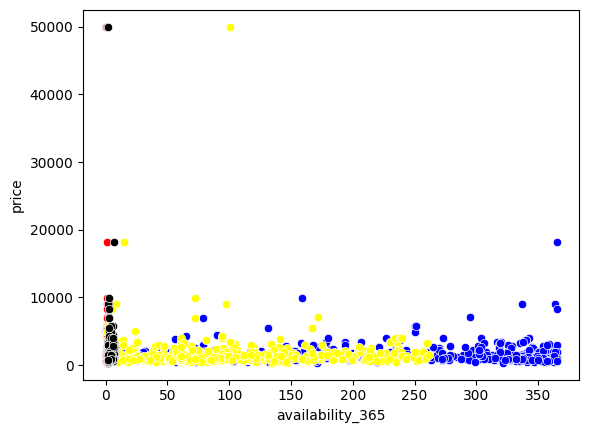

In [ ]:
from turtle import color


sns.scatterplot(x='availability_365', y='price', color="blue", data=filtro2)
sns.scatterplot(x='host_response_rate', y='price', color="red", data=filtro2)
sns.scatterplot(x='number_of_reviews', y='price', color="yellow", data=filtro2)
sns.scatterplot(x='accommodates', y='price', color="black", data=filtro2)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= filtro2[['availability_365', 'host_response_rate','number_of_reviews',"accommodates"]]
Var_Dep= filtro2['price']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365', 'host_response_rate', 'number_of_reviews',
        'accommodates'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ -1.05590247, 592.57053792,  -1.32915096, 135.14471894]),
 'rank_': 4,
 'singular_': array([2.52016415e+03, 1.47467414e+03, 2.91843918e+01, 2.28777552e+00]),
 'intercept_': 1039.0003888143272}

**Modelo matemático: y= 0.62534291x1 + 0.01978015x2 + 0.81582765x3 + 1.2098448339476615**

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.008591308943996179

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=filtro2[['availability_365', 'host_response_rate','number_of_reviews',"accommodates"]])
y_pred

array([2298.73883807, 1638.16172831, 1517.97871477, 1794.63962737,
       1597.23129695, 1463.73339022, 1553.84777258, 1475.58983972,
       2010.42101771, 1724.31868239, 1960.08898826, 1828.83418385,
       1994.7638097 , 1679.71283968, 1937.553997  , 1767.61611735,
       2005.10546044, 1483.6825632 , 1735.69116803, 1682.3711416 ,
       1221.36096636, 1524.82736733, 1724.31868239, 1822.09309154,
       1366.69166197, 1760.8399514 , 1481.63839812, 1473.24842097,
       1626.75113493, 2159.06298019, 1762.39906974, 1712.66784368,
       1941.39927346, 1795.83770627, 2339.43311245, 1760.12529084,
       1796.59406572, 2162.63961552, 1313.18738958, 2129.96440319,
       1505.05370997, 1333.6608756 , 1321.07077218, 2325.78337431,
       2175.8053214 , 1848.93610494, 1890.72710553, 1595.66225676,
       1426.52252862, 1473.65607404, 1595.32417935, 1611.72615378,
       1509.71627454, 1659.89247163, 1428.14226824, 2046.68848819,
       1769.29269983, 1906.84503448, 1649.22642623, 1901.80167

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
filtro2.insert(0, 'Predicciones', y_pred)
filtro2

,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2,2298.738838,2,https://www.airbnb.com/rooms/696037,29/03/23,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,https://www.airbnb.com/users/show/3531879,...,4.71,4.92,4.92,4.90,4.71,3.0,3.0,0.0,0.0,0.31
6,1638.161728,6,https://www.airbnb.com/rooms/56074,29/03/23,city scrape,Great space in historical San Rafael,This great apartment is located in one of the ...,Very traditional neighborhood with all service...,https://a0.muscache.com/pictures/3005118/60dac...,https://www.airbnb.com/users/show/265650,...,4.88,4.98,4.94,4.75,4.79,1.0,1.0,0.0,0.0,0.58
9,1517.978715,9,https://www.airbnb.com/rooms/728372,29/03/23,city scrape,Casa Indigo in the Center DF groups until 29 Pers,Reformed House from the Art Deco period built ...,"Is located in a very convenient area, I like t...",https://a0.muscache.com/pictures/677b64ac-0c73...,https://www.airbnb.com/users/show/3777702,...,4.69,4.88,4.88,4.90,4.75,6.0,3.0,3.0,0.0,0.95
10,1794.639627,10,https://www.airbnb.com/rooms/2083241,30/03/23,city scrape,Condesa Apartment in 1920s Landmarked Art Nouv...,This newly redecorated (after these photos wer...,"Stroll in Parque Mexico and Parque Espana, jus...",https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/8282570,...,4.96,5.00,4.99,4.95,4.91,3.0,3.0,0.0,0.0,2.63
13,1597.231297,13,https://www.airbnb.com/rooms/70644,29/03/23,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,https://www.airbnb.com/users/show/212109,...,4.95,4.95,4.98,4.96,4.92,3.0,2.0,1.0,0.0,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1858,2013.768165,1858,https://www.airbnb.com/rooms/16107421,30/03/23,city scrape,6. Modern and amazing apartment in Mexico City,- Brillante Depto a pasos de Reforma.<br />- A...,"A pasos de Reforma (Shopping 222), el Ãngel d...",https://a0.muscache.com/pictures/226215ea-6076...,https://www.airbnb.com/users/show/31915089,...,4.68,4.98,4.84,4.88,4.73,2.0,2.0,0.0,0.0,1.33
1859,1635.619996,1859,https://www.airbnb.com/rooms/15820435,30/03/23,city scrape,"Celebrate ""DÃ­a de muertos"" @ CDMX (P13)","This pad is the perfect example of the ""DÃ­a d...",A solo unos pasos de la hermosa Plaza de Santo...,https://a0.muscache.com/pictures/b70aba3b-a32e...,https://www.airbnb.com/users/show/4448934,...,4.88,4.90,4.81,4.90,4.73,2.7,1.3,0.0,0.0,1.69
1860,1714.039903,1860,https://www.airbnb.com/rooms/15821413,30/03/23,city scrape,"Modern and Cozy apartment very near to ""El ZÃ³...","The top-notch location, decoration, amenities,...",El edificio estÃ¡ a unos pasos de la plaza de ...,https://a0.muscache.com/pictures/de688e87-df8e...,https://www.airbnb.com/users/show/4448934,...,4.98,4.96,4.90,4.90,4.86,2.7,1.3,0.0,0.0,0.93
1863,1344.138653,1863,https://www.airbnb.com/rooms/15821898,30/03/23,city scrape,comfortable and cute studio,"Featuring a working table, wifi and DSL cable,...","Condesa is a great neighborhood to be, is safe...",https://a0.muscache.com/pictures/0d205e14-f410...,https://www.airbnb.com/users/show/1497087,...,4.57,4.85,4.77,4.95,4.62,10.0,1.3,0.0,0.0,1.76


In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

#sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=filtro1)
#sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=filtro1)

#sns.lineplot(x='host_response_rate', y='Predicciones', color="red", data=filtro1)

<Axes: xlabel='number_of_reviews', ylabel='price'>

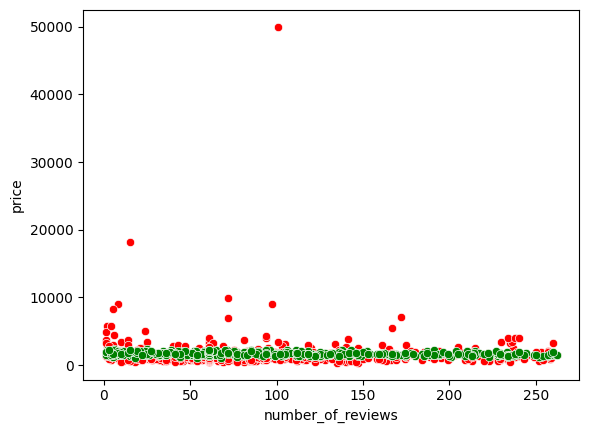

In [ ]:
#sns.scatterplot(x='availability_365', y='price', color="blue", data=filtro2)
sns.scatterplot(x='number_of_reviews', y='price', color="red", data=filtro2)
#sns.scatterplot(x='number_of_reviews', y='price', color="yellow", data=filtro2)
#sns.scatterplot(x='accommodates', y='price', color="black", data=filtro2)
sns.scatterplot(x='number_of_reviews', y='Predicciones', color="green", data=filtro2)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.008591308943996179

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.0926893140766301

##filtro **Entire home/apt** “host_acceptance_rate vs number_of_reviews,review_scores_cleanliness,review_scores_communication ”








In [ ]:
filtro3 = mex[mex["room_type"] == "Entire home/apt"]

In [ ]:
filtro3 = filtro3.replace('sin registro', pd.np.nan)

<ipython-input-691-78784c3836ad>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  filtro3 = filtro3.replace('sin registro', pd.np.nan)


In [ ]:
filtro3.dropna(inplace=True)

In [ ]:
filtro3['host_acceptance_rate'] = filtro3['host_acceptance_rate'].replace('%', '', regex=True).astype('float') / 100

In [ ]:
filtro3['price'] = filtro3['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [ ]:
filtro3[['host_acceptance_rate',"host_response_rate"]] = filtro3[['host_acceptance_rate',"host_response_rate"]].replace('%', '', regex=True).astype('float') / 100

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

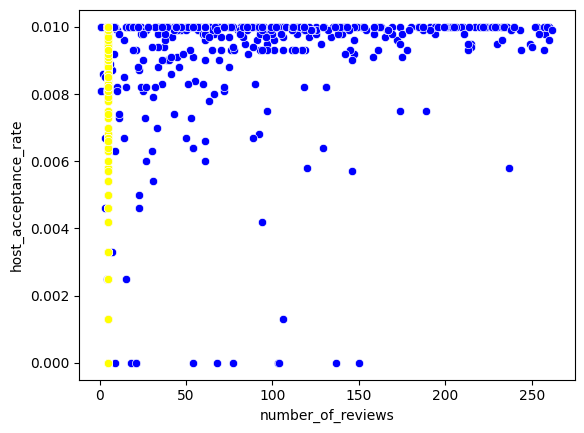

In [ ]:
from turtle import color


sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=filtro3)
sns.scatterplot(x='review_scores_cleanliness', y='host_acceptance_rate', color="red", data=filtro3)
sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="yellow", data=filtro3)
#sns.scatterplot(x='accommodates', y='host_acceptance_rate', color="black", data=filtro3)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= filtro3[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']]
Var_Dep= filtro3['host_acceptance_rate']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'review_scores_cleanliness',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 5.74851553e-06,  6.61528680e-04, -2.42574074e-03]),
 'rank_': 3,
 'singular_': array([1.47490597e+03, 2.67619418e+00, 1.24568679e+00]),
 'intercept_': 0.017350280174449062}

**Modelo matemático: y= 0.62534291x1 + 0.01978015x2 + 0.81582765x3 + 1.2098448339476615**

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.04808566545984405

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=filtro3[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']])
y_pred

array([0.00875563, 0.00907826, 0.00930506, 0.00887653, 0.00919999,
       0.00867973, 0.00912037, 0.00898029, 0.00980926, 0.00898017,
       0.0085029 , 0.00892186, 0.00926527, 0.00891007, 0.00875446,
       0.00916937, 0.00889875, 0.00975882, 0.00869301, 0.00872656,
       0.00999683, 0.00882021, 0.00895151, 0.0091566 , 0.00990486,
       0.00902429, 0.00889698, 0.00983623, 0.00899561, 0.00922625,
       0.00918029, 0.00974578, 0.00923379, 0.00871075, 0.00856371,
       0.00865175, 0.00862482, 0.00897595, 0.01025799, 0.00893489,
       0.00871806, 0.0088977 , 0.00945806, 0.00905885, 0.00854072,
       0.00910227, 0.00955241, 0.00868224, 0.00931806, 0.00894268,
       0.00961681, 0.00880533, 0.00945823, 0.00903706, 0.00998126,
       0.00867176, 0.00900382, 0.00853497, 0.00877754, 0.00855221,
       0.00950371, 0.00994589, 0.00881478, 0.00925961, 0.00893226,
       0.00887873, 0.00912653, 0.00884345, 0.00868899, 0.00889859,
       0.0094038 , 0.00923361, 0.00875736, 0.00936609, 0.00879

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
filtro3.insert(0, 'Predicciones', y_pred)
filtro3

,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2,0.008756,2,https://www.airbnb.com/rooms/696037,29/03/23,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,https://www.airbnb.com/users/show/3531879,...,4.71,4.92,4.92,4.90,4.71,3.0,3.0,0.0,0.0,0.31
6,0.009078,6,https://www.airbnb.com/rooms/56074,29/03/23,city scrape,Great space in historical San Rafael,This great apartment is located in one of the ...,Very traditional neighborhood with all service...,https://a0.muscache.com/pictures/3005118/60dac...,https://www.airbnb.com/users/show/265650,...,4.88,4.98,4.94,4.75,4.79,1.0,1.0,0.0,0.0,0.58
9,0.009305,9,https://www.airbnb.com/rooms/728372,29/03/23,city scrape,Casa Indigo in the Center DF groups until 29 Pers,Reformed House from the Art Deco period built ...,"Is located in a very convenient area, I like t...",https://a0.muscache.com/pictures/677b64ac-0c73...,https://www.airbnb.com/users/show/3777702,...,4.69,4.88,4.88,4.90,4.75,6.0,3.0,3.0,0.0,0.95
10,0.008877,10,https://www.airbnb.com/rooms/2083241,30/03/23,city scrape,Condesa Apartment in 1920s Landmarked Art Nouv...,This newly redecorated (after these photos wer...,"Stroll in Parque Mexico and Parque Espana, jus...",https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/8282570,...,4.96,5.00,4.99,4.95,4.91,3.0,3.0,0.0,0.0,2.63
13,0.009200,13,https://www.airbnb.com/rooms/70644,29/03/23,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,https://www.airbnb.com/users/show/212109,...,4.95,4.95,4.98,4.96,4.92,3.0,2.0,1.0,0.0,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1858,0.009194,1858,https://www.airbnb.com/rooms/16107421,30/03/23,city scrape,6. Modern and amazing apartment in Mexico City,- Brillante Depto a pasos de Reforma.<br />- A...,"A pasos de Reforma (Shopping 222), el Ãngel d...",https://a0.muscache.com/pictures/226215ea-6076...,https://www.airbnb.com/users/show/31915089,...,4.68,4.98,4.84,4.88,4.73,2.0,2.0,0.0,0.0,1.33
1859,0.009664,1859,https://www.airbnb.com/rooms/15820435,30/03/23,city scrape,"Celebrate ""DÃ­a de muertos"" @ CDMX (P13)","This pad is the perfect example of the ""DÃ­a d...",A solo unos pasos de la hermosa Plaza de Santo...,https://a0.muscache.com/pictures/b70aba3b-a32e...,https://www.airbnb.com/users/show/4448934,...,4.88,4.90,4.81,4.90,4.73,2.7,1.3,0.0,0.0,1.69
1860,0.009172,1860,https://www.airbnb.com/rooms/15821413,30/03/23,city scrape,"Modern and Cozy apartment very near to ""El ZÃ³...","The top-notch location, decoration, amenities,...",El edificio estÃ¡ a unos pasos de la plaza de ...,https://a0.muscache.com/pictures/de688e87-df8e...,https://www.airbnb.com/users/show/4448934,...,4.98,4.96,4.90,4.90,4.86,2.7,1.3,0.0,0.0,0.93
1863,0.009584,1863,https://www.airbnb.com/rooms/15821898,30/03/23,city scrape,comfortable and cute studio,"Featuring a working table, wifi and DSL cable,...","Condesa is a great neighborhood to be, is safe...",https://a0.muscache.com/pictures/0d205e14-f410...,https://www.airbnb.com/users/show/1497087,...,4.57,4.85,4.77,4.95,4.62,10.0,1.3,0.0,0.0,1.76


In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

#sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=filtro1)
#sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=filtro1)

#sns.lineplot(x='host_response_rate', y='Predicciones', color="red", data=filtro1)

<Axes: xlabel='review_scores_cleanliness', ylabel='host_acceptance_rate'>

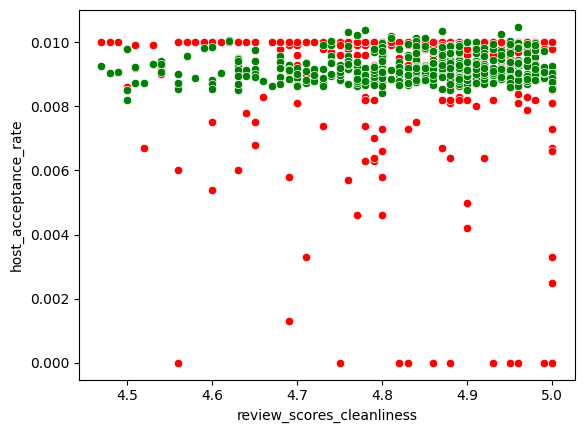

In [ ]:
#sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=filtro3)
sns.scatterplot(x='review_scores_cleanliness', y='host_acceptance_rate', color="red", data=filtro3)
#sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="yellow", data=filtro3)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones', color="green", data=filtro3)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.04808566545984405

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.21928443962088157

##ESP

In [ ]:
#españa= pd.read_csv("Girona_España.csv")
españa= pd.read_csv("Datos_limpios_IQR_España.csv")

españa.head(2)

,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,https://www.airbnb.com/rooms/14551,31/03/2023,city scrape,Cozy & Colorful by Nature (Private Room),Up in the hill of Montjuïc (a mountain overloo...,Montjuïc is most likely the best neighborhood ...,https://a0.muscache.com/pictures/16209908/f1fe...,https://www.airbnb.com/users/show/57237,Mun,...,4.94,4.89,4.91,4.63,4.74,1.0,0.0,0.0,0.0,0.37
1,1,https://www.airbnb.com/rooms/1205757,31/03/2023,city scrape,Habitación doble + baño y terraza,<b>The space</b><br />Habitación confortable e...,Bonitas playas a 15 minutos en coche. Piscina ...,https://a0.muscache.com/pictures/02e0a61e-078e...,https://www.airbnb.com/users/show/6586355,Montse,...,4.85,4.85,4.91,4.69,4.80,1.0,0.0,0.0,0.0,0.51


##filtro **Entire home/apt**  “host_acceptance_rate vs host_response_rate, Price, number_of_reviews , review_scores_rating”






In [ ]:
filtro1 = españa[españa["room_type"] == "Entire home/apt"]

In [ ]:
filtro1 = filtro1.replace('sin registro', pd.np.nan)

<ipython-input-711-145afc511beb>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  filtro1 = filtro1.replace('sin registro', pd.np.nan)


In [ ]:
#filtro1esp.dropna(inplace=True)

In [ ]:
filtro1['host_acceptance_rate'] = filtro1['host_acceptance_rate'].replace('%', '', regex=True).astype('float') / 100

In [ ]:
#filtro1['price'] =filtro1['price'] .replace({"1,089.00":"$1089.00"},regex=False)

In [ ]:
filtro1['price'] = filtro1['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [ ]:
#= filtro1['price'].str.replace('$', '').astype(float)

In [ ]:
filtro1[['host_acceptance_rate',"host_response_rate"]] = filtro1[['host_acceptance_rate',"host_response_rate"]].replace('%', '', regex=True).astype('float') / 100

In [ ]:
filtro1.dropna(subset=["host_response_rate","price","number_of_reviews","host_acceptance_rate","review_scores_rating"], inplace=True)

In [ ]:
filtro1[["host_response_rate","price","number_of_reviews","host_acceptance_rate","review_scores_rating"]].head(10)

,host_response_rate,price,number_of_reviews,host_acceptance_rate,review_scores_rating
2,1.00,74.0,74.0,0.0080,4.46
5,1.00,105.0,29.0,0.0100,4.69
6,1.00,110.0,15.0,0.0100,4.36
8,1.00,83.0,30.5,0.0100,4.73
10,1.00,195.0,84.0,0.0099,4.92
11,1.00,120.0,34.0,0.0080,4.84
14,1.00,114.0,28.0,0.0091,4.96
15,0.40,173.0,0.0,0.0012,4.60
16,0.98,150.0,21.0,0.0091,4.40
18,1.00,850.0,22.0,0.0100,4.82


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

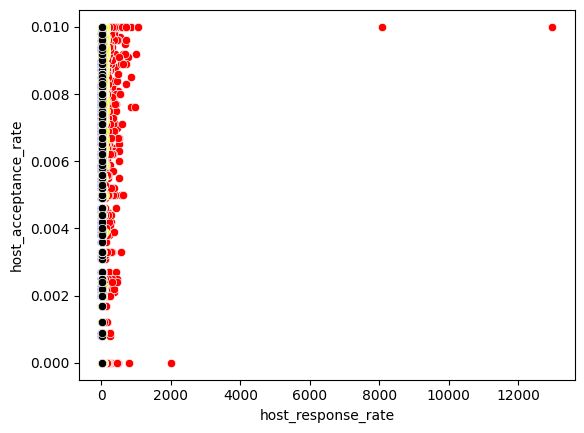

In [ ]:
from turtle import color


sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=filtro1)
sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=filtro1)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="yellow", data=filtro1)
sns.scatterplot(x='review_scores_rating', y='host_acceptance_rate', color="black", data=filtro1)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= filtro1[['host_response_rate', 'price','number_of_reviews',"review_scores_rating"]]
Var_Dep= filtro1['host_acceptance_rate']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate', 'price', 'number_of_reviews',
        'review_scores_rating'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 7.26645019e-03,  1.66701655e-07,  1.03069556e-05, -4.79834968e-04]),
 'rank_': 4,
 'singular_': array([1.58634622e+04, 1.03581923e+03, 8.04925385e+00, 6.33877969e+00]),
 'intercept_': 0.0033365853332104466}

**Modelo matemático: y= 0.62534291x1 + 0.01978015x2 + 0.81582765x3 + 1.2098448339476615**

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.31266705385412374

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=filtro1[['host_response_rate', 'price','number_of_reviews',"review_scores_rating"]])
y_pred

array([0.00923802, 0.00866901, 0.0086839 , ..., 0.00877439, 0.00882067,
       0.0086122 ])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
filtro1.insert(0, 'Predicciones', y_pred)
filtro1

,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2,0.009238,2,https://www.airbnb.com/rooms/1212820,01/04/2023,city scrape,Apartment port de rei stunning wiew,<b>The space</b><br />Apartments first line un...,NaN,https://a0.muscache.com/pictures/18245529/0886...,https://www.airbnb.com/users/show/6620645,...,4.31,4.81,4.76,4.74,4.32,2.0,2.0,0.0,0.0,0.62
5,0.008669,5,https://www.airbnb.com/rooms/751997,01/04/2023,city scrape,CAN FELIP - Ático loft del s.XVIII,"Magnífica casa de pueblo del siglo XVIII, ubic...",Palafrugell se remonta al siglo X. El núcleo a...,https://a0.muscache.com/pictures/f50b37b3-1c4d...,https://www.airbnb.com/users/show/3387407,...,4.69,4.69,4.90,4.79,4.59,12.0,1.9,0.0,0.0,0.34
6,0.008684,6,https://www.airbnb.com/rooms/752035,31/03/2023,city scrape,CAN TARONGETA - Soleado Apto. 1-1,Magnífico Apartamento de 62m² con 2 dormitorio...,Palafrugell se remonta al siglo X. El núcleo a...,https://a0.muscache.com/pictures/303024e1-2deb...,https://www.airbnb.com/users/show/3387407,...,4.79,4.43,4.50,4.50,4.36,12.0,1.9,0.0,0.0,0.13
8,0.008662,8,https://www.airbnb.com/rooms/45400,01/04/2023,city scrape,Begur - Loft - Costa Brava - SPAIN,<b>The space</b><br />Flat / Apartment. New. P...,NaN,https://a0.muscache.com/pictures/2206667/ea3bd...,https://www.airbnb.com/users/show/201228,...,4.73,4.93,4.94,4.89,4.70,1.0,1.0,0.0,0.0,0.30
10,0.009141,10,https://www.airbnb.com/rooms/753604,01/04/2023,city scrape,"""La Talaia"" Holiday House-BBQ-WiFi-Pool",La Talaia is the perfect choice if you want a ...,Lloret de Mar is a Spanish municipality in the...,https://a0.muscache.com/pictures/12094143/5f9f...,https://www.airbnb.com/users/show/3964191,...,4.95,4.95,4.98,4.81,4.80,6.0,6.0,0.0,0.0,0.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,0.008890,1497,https://www.airbnb.com/rooms/8308725,01/04/2023,city scrape,Great Apartment in the City Center,"It's a 10' walk from Barri Vell, the old town....",NaN,https://a0.muscache.com/pictures/108163275/f14...,https://www.airbnb.com/users/show/3846528,...,4.97,4.84,4.95,4.78,4.79,1.0,1.0,0.0,0.0,0.66
1500,0.008482,1499,https://www.airbnb.com/rooms/10652423,01/04/2023,city scrape,Apartamento en Pals con piscina junto a la playa!,"Fabuloso apartamento en la Costa Brava, muy ce...",Nº de licencia turística: HUTG-16806,https://a0.muscache.com/pictures/68703dd4-0679...,https://www.airbnb.com/users/show/7648299,...,4.42,4.92,4.92,4.92,4.67,3.0,3.0,0.0,0.0,0.15
1504,0.008774,1503,https://www.airbnb.com/rooms/9324193,01/04/2023,city scrape,APARTAMENT ROSES / CANYELLES PETITA BEACH,"Apartment seafront, three meters are in the sa...",NaN,https://a0.muscache.com/pictures/9d667199-3ca7...,https://www.airbnb.com/users/show/22949980,...,4.64,4.55,4.82,4.64,4.27,2.0,2.0,0.0,0.0,0.13
1505,0.008821,1504,https://www.airbnb.com/rooms/8331883,01/04/2023,city scrape,Rosas Lisboa Mas Oliva,SALLE DE BAIN RÉNOVÉE FIN 2021!!! NOUVEAU CANA...,Cette résidence se trouve dans le quartier Mas...,https://a0.muscache.com/pictures/331f669f-ab20...,https://www.airbnb.com/users/show/43182264,...,4.48,4.85,4.89,4.67,4.63,1.0,1.0,0.0,0.0,0.52


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

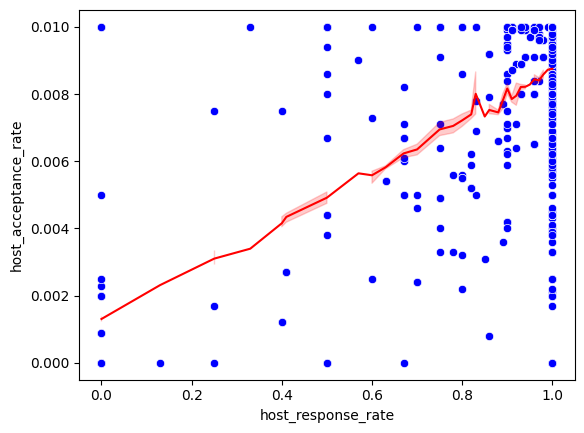

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=filtro1)
#sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=filtro1)

sns.lineplot(x='host_response_rate', y='Predicciones', color="red", data=filtro1)

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

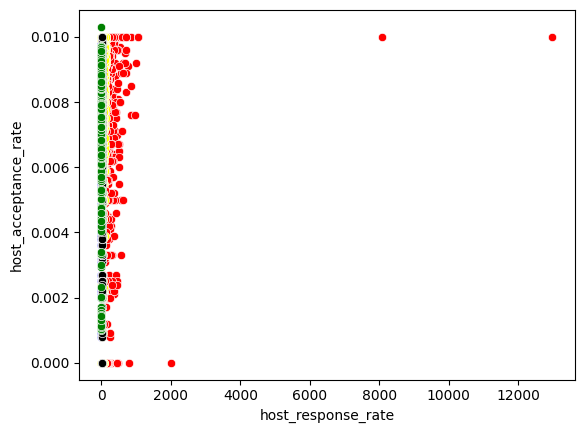

In [ ]:
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=filtro1)
sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=filtro1)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="yellow", data=filtro1)
sns.scatterplot(x='review_scores_rating', y='host_acceptance_rate', color="black", data=filtro1)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="green", data=filtro1)


In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.31266705385412374

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.5591663919211559

##filtro **Entire home/apt** “Price” vs availability_365, host_response_rate, number_of_reviews, accommodates“







In [ ]:
filtro2 = españa[españa["room_type"] == "Entire home/apt"]
filtro2

,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2,2,https://www.airbnb.com/rooms/1212820,01/04/2023,city scrape,Apartment port de rei stunning wiew,<b>The space</b><br />Apartments first line un...,sin registro,https://a0.muscache.com/pictures/18245529/0886...,https://www.airbnb.com/users/show/6620645,Myriam,...,4.31,4.81,4.76,4.74,4.32,2.0,2.0,0.0,0.0,0.62
4,4,https://www.airbnb.com/rooms/41342,01/04/2023,previous scrape,Beachfront Tamariua (Costa Brava),A little paradise by the sea. Apartment 2/4 ad...,Apartment located outside the town on a small ...,https://a0.muscache.com/pictures/70414801/59d4...,https://www.airbnb.com/users/show/180072,Marisa,...,4.82,4.73,4.73,4.91,4.36,1.0,1.0,0.0,0.0,0.09
5,5,https://www.airbnb.com/rooms/751997,01/04/2023,city scrape,CAN FELIP - Ático loft del s.XVIII,"Magnífica casa de pueblo del siglo XVIII, ubic...",Palafrugell se remonta al siglo X. El núcleo a...,https://a0.muscache.com/pictures/f50b37b3-1c4d...,https://www.airbnb.com/users/show/3387407,Enric & Gemma,...,4.69,4.69,4.90,4.79,4.59,12.0,1.9,0.0,0.0,0.34
6,6,https://www.airbnb.com/rooms/752035,31/03/2023,city scrape,CAN TARONGETA - Soleado Apto. 1-1,Magnífico Apartamento de 62m² con 2 dormitorio...,Palafrugell se remonta al siglo X. El núcleo a...,https://a0.muscache.com/pictures/303024e1-2deb...,https://www.airbnb.com/users/show/3387407,Enric & Gemma,...,4.79,4.43,4.50,4.50,4.36,12.0,1.9,0.0,0.0,0.13
7,7,https://www.airbnb.com/rooms/1215790,01/04/2023,city scrape,"100m FROM THE BEACH, with TERRACE","Big apartment with terrace (7 people), next to...",sin registro,https://a0.muscache.com/pictures/ea54a005-62f2...,https://www.airbnb.com/users/show/3149645,Cristina,...,4.78,4.89,5.00,4.56,4.11,1.0,1.0,0.0,0.0,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,1503,https://www.airbnb.com/rooms/9324193,01/04/2023,city scrape,APARTAMENT ROSES / CANYELLES PETITA BEACH,"Apartment seafront, three meters are in the sa...",sin registro,https://a0.muscache.com/pictures/9d667199-3ca7...,https://www.airbnb.com/users/show/22949980,Verónica,...,4.64,4.55,4.82,4.64,4.27,2.0,2.0,0.0,0.0,0.13
1505,1504,https://www.airbnb.com/rooms/8331883,01/04/2023,city scrape,Rosas Lisboa Mas Oliva,SALLE DE BAIN RÉNOVÉE FIN 2021!!! NOUVEAU CANA...,Cette résidence se trouve dans le quartier Mas...,https://a0.muscache.com/pictures/331f669f-ab20...,https://www.airbnb.com/users/show/43182264,Magali,...,4.48,4.85,4.89,4.67,4.63,1.0,1.0,0.0,0.0,0.52
1506,1505,https://www.airbnb.com/rooms/9339118,01/04/2023,city scrape,villa/ piscine,"Beau logement spacieux rénové, vue magnifique...","Découvrez Calonge et ses environs, entre l'his...",https://a0.muscache.com/pictures/b50717fc-7bdb...,https://www.airbnb.com/users/show/48470786,Marianne,...,5.00,4.83,4.50,4.33,4.67,1.0,1.0,0.0,0.0,0.07
1507,1506,https://www.airbnb.com/rooms/10654166,01/04/2023,previous scrape,Duplex céntrico con amplia terraza,Dúplex céntrico con amplia terraza privada equ...,"Zona muy tranquila, situada en el centro de la...",https://a0.muscache.com/pictures/fecc7e53-ae26...,https://www.airbnb.com/users/show/55021795,Marta,...,4.91,4.94,4.94,4.76,4.77,1.0,1.0,0.0,0.0,0.80


In [ ]:
filtro2 = filtro2.replace('sin registro', pd.np.nan)
filtro2

<ipython-input-731-79255335fb94>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  filtro2 = filtro2.replace('sin registro', pd.np.nan)


,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2,2,https://www.airbnb.com/rooms/1212820,01/04/2023,city scrape,Apartment port de rei stunning wiew,<b>The space</b><br />Apartments first line un...,NaN,https://a0.muscache.com/pictures/18245529/0886...,https://www.airbnb.com/users/show/6620645,Myriam,...,4.31,4.81,4.76,4.74,4.32,2.0,2.0,0.0,0.0,0.62
4,4,https://www.airbnb.com/rooms/41342,01/04/2023,previous scrape,Beachfront Tamariua (Costa Brava),A little paradise by the sea. Apartment 2/4 ad...,Apartment located outside the town on a small ...,https://a0.muscache.com/pictures/70414801/59d4...,https://www.airbnb.com/users/show/180072,Marisa,...,4.82,4.73,4.73,4.91,4.36,1.0,1.0,0.0,0.0,0.09
5,5,https://www.airbnb.com/rooms/751997,01/04/2023,city scrape,CAN FELIP - Ático loft del s.XVIII,"Magnífica casa de pueblo del siglo XVIII, ubic...",Palafrugell se remonta al siglo X. El núcleo a...,https://a0.muscache.com/pictures/f50b37b3-1c4d...,https://www.airbnb.com/users/show/3387407,Enric & Gemma,...,4.69,4.69,4.90,4.79,4.59,12.0,1.9,0.0,0.0,0.34
6,6,https://www.airbnb.com/rooms/752035,31/03/2023,city scrape,CAN TARONGETA - Soleado Apto. 1-1,Magnífico Apartamento de 62m² con 2 dormitorio...,Palafrugell se remonta al siglo X. El núcleo a...,https://a0.muscache.com/pictures/303024e1-2deb...,https://www.airbnb.com/users/show/3387407,Enric & Gemma,...,4.79,4.43,4.50,4.50,4.36,12.0,1.9,0.0,0.0,0.13
7,7,https://www.airbnb.com/rooms/1215790,01/04/2023,city scrape,"100m FROM THE BEACH, with TERRACE","Big apartment with terrace (7 people), next to...",NaN,https://a0.muscache.com/pictures/ea54a005-62f2...,https://www.airbnb.com/users/show/3149645,Cristina,...,4.78,4.89,5.00,4.56,4.11,1.0,1.0,0.0,0.0,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,1503,https://www.airbnb.com/rooms/9324193,01/04/2023,city scrape,APARTAMENT ROSES / CANYELLES PETITA BEACH,"Apartment seafront, three meters are in the sa...",NaN,https://a0.muscache.com/pictures/9d667199-3ca7...,https://www.airbnb.com/users/show/22949980,Verónica,...,4.64,4.55,4.82,4.64,4.27,2.0,2.0,0.0,0.0,0.13
1505,1504,https://www.airbnb.com/rooms/8331883,01/04/2023,city scrape,Rosas Lisboa Mas Oliva,SALLE DE BAIN RÉNOVÉE FIN 2021!!! NOUVEAU CANA...,Cette résidence se trouve dans le quartier Mas...,https://a0.muscache.com/pictures/331f669f-ab20...,https://www.airbnb.com/users/show/43182264,Magali,...,4.48,4.85,4.89,4.67,4.63,1.0,1.0,0.0,0.0,0.52
1506,1505,https://www.airbnb.com/rooms/9339118,01/04/2023,city scrape,villa/ piscine,"Beau logement spacieux rénové, vue magnifique...","Découvrez Calonge et ses environs, entre l'his...",https://a0.muscache.com/pictures/b50717fc-7bdb...,https://www.airbnb.com/users/show/48470786,Marianne,...,5.00,4.83,4.50,4.33,4.67,1.0,1.0,0.0,0.0,0.07
1507,1506,https://www.airbnb.com/rooms/10654166,01/04/2023,previous scrape,Duplex céntrico con amplia terraza,Dúplex céntrico con amplia terraza privada equ...,"Zona muy tranquila, situada en el centro de la...",https://a0.muscache.com/pictures/fecc7e53-ae26...,https://www.airbnb.com/users/show/55021795,Marta,...,4.91,4.94,4.94,4.76,4.77,1.0,1.0,0.0,0.0,0.80


In [ ]:
#filtro2.dropna(inplace=True)
#filtro2

In [ ]:
filtro2['host_acceptance_rate'] = filtro2['host_acceptance_rate'].replace('%', '', regex=True).astype('float') / 100

In [ ]:
filtro2['price'] = filtro2['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [ ]:
filtro2[['host_acceptance_rate',"host_response_rate"]] = filtro2[['host_acceptance_rate',"host_response_rate"]].replace('%', '', regex=True).astype('float') / 100

In [ ]:
filtro2.dropna(subset=['availability_365', 'host_response_rate','number_of_reviews',"accommodates"], inplace=True)

In [ ]:
filtro2["number_of_reviews"]

2       74.0
5       29.0
6       15.0
8       30.5
10      84.0
        ... 
1498    60.0
1500    12.0
1504    11.0
1505    46.0
1506     6.0
Name: number_of_reviews, Length: 1220, dtype: float64

<Axes: xlabel='availability_365', ylabel='price'>

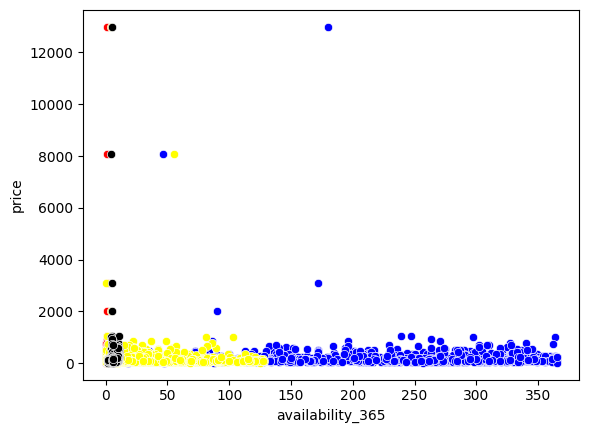

In [ ]:
from turtle import color


sns.scatterplot(x='availability_365', y='price', color="blue", data=filtro2)
sns.scatterplot(x='host_response_rate', y='price', color="red", data=filtro2)
sns.scatterplot(x='number_of_reviews', y='price', color="yellow", data=filtro2)
sns.scatterplot(x='accommodates', y='price', color="black", data=filtro2)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= filtro2[['availability_365', 'host_response_rate','number_of_reviews',"accommodates"]]
Var_Dep= filtro2['price']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365', 'host_response_rate', 'number_of_reviews',
        'accommodates'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ -0.09905053, -26.91451945,  -0.61122287,  25.24210989]),
 'rank_': 4,
 'singular_': array([3614.26066396, 1044.91933105,   64.78370645,    6.82248484]),
 'intercept_': 122.90171860374568}

**Modelo matemático: y= 0.62534291x1 + 0.01978015x2 + 0.81582765x3 + 1.2098448339476615**

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.013921041466291362

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=filtro2[['availability_365', 'host_response_rate','number_of_reviews',"accommodates"]])
y_pred

array([120.52423067, 151.69412935, 154.50631909, ..., 181.59901731,
       203.77267388, 214.55261625])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
filtro2.insert(0, 'Predicciones', y_pred)
filtro2

,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2,120.524231,2,https://www.airbnb.com/rooms/1212820,01/04/2023,city scrape,Apartment port de rei stunning wiew,<b>The space</b><br />Apartments first line un...,NaN,https://a0.muscache.com/pictures/18245529/0886...,https://www.airbnb.com/users/show/6620645,...,4.31,4.81,4.76,4.74,4.32,2.0,2.0,0.0,0.0,0.62
5,151.694129,5,https://www.airbnb.com/rooms/751997,01/04/2023,city scrape,CAN FELIP - Ático loft del s.XVIII,"Magnífica casa de pueblo del siglo XVIII, ubic...",Palafrugell se remonta al siglo X. El núcleo a...,https://a0.muscache.com/pictures/f50b37b3-1c4d...,https://www.airbnb.com/users/show/3387407,...,4.69,4.69,4.90,4.79,4.59,12.0,1.9,0.0,0.0,0.34
6,154.506319,6,https://www.airbnb.com/rooms/752035,31/03/2023,city scrape,CAN TARONGETA - Soleado Apto. 1-1,Magnífico Apartamento de 62m² con 2 dormitorio...,Palafrugell se remonta al siglo X. El núcleo a...,https://a0.muscache.com/pictures/303024e1-2deb...,https://www.airbnb.com/users/show/3387407,...,4.79,4.43,4.50,4.50,4.36,12.0,1.9,0.0,0.0,0.13
8,149.786790,8,https://www.airbnb.com/rooms/45400,01/04/2023,city scrape,Begur - Loft - Costa Brava - SPAIN,<b>The space</b><br />Flat / Apartment. New. P...,NaN,https://a0.muscache.com/pictures/2206667/ea3bd...,https://www.airbnb.com/users/show/201228,...,4.73,4.93,4.94,4.89,4.70,1.0,1.0,0.0,0.0,0.30
10,179.753801,10,https://www.airbnb.com/rooms/753604,01/04/2023,city scrape,"""La Talaia"" Holiday House-BBQ-WiFi-Pool",La Talaia is the perfect choice if you want a ...,Lloret de Mar is a Spanish municipality in the...,https://a0.muscache.com/pictures/12094143/5f9f...,https://www.airbnb.com/users/show/3964191,...,4.95,4.95,4.98,4.81,4.80,6.0,6.0,0.0,0.0,0.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,99.199640,1497,https://www.airbnb.com/rooms/8308725,01/04/2023,city scrape,Great Apartment in the City Center,"It's a 10' walk from Barri Vell, the old town....",NaN,https://a0.muscache.com/pictures/108163275/f14...,https://www.airbnb.com/users/show/3846528,...,4.97,4.84,4.95,4.78,4.79,1.0,1.0,0.0,0.0,0.66
1500,225.247605,1499,https://www.airbnb.com/rooms/10652423,01/04/2023,city scrape,Apartamento en Pals con piscina junto a la playa!,"Fabuloso apartamento en la Costa Brava, muy ce...",Nº de licencia turística: HUTG-16806,https://a0.muscache.com/pictures/68703dd4-0679...,https://www.airbnb.com/users/show/7648299,...,4.42,4.92,4.92,4.92,4.67,3.0,3.0,0.0,0.0,0.15
1504,181.599017,1503,https://www.airbnb.com/rooms/9324193,01/04/2023,city scrape,APARTAMENT ROSES / CANYELLES PETITA BEACH,"Apartment seafront, three meters are in the sa...",NaN,https://a0.muscache.com/pictures/9d667199-3ca7...,https://www.airbnb.com/users/show/22949980,...,4.64,4.55,4.82,4.64,4.27,2.0,2.0,0.0,0.0,0.13
1505,203.772674,1504,https://www.airbnb.com/rooms/8331883,01/04/2023,city scrape,Rosas Lisboa Mas Oliva,SALLE DE BAIN RÉNOVÉE FIN 2021!!! NOUVEAU CANA...,Cette résidence se trouve dans le quartier Mas...,https://a0.muscache.com/pictures/331f669f-ab20...,https://www.airbnb.com/users/show/43182264,...,4.48,4.85,4.89,4.67,4.63,1.0,1.0,0.0,0.0,0.52


In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

#sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=filtro1)
#sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=filtro1)

#sns.lineplot(x='host_response_rate', y='Predicciones', color="red", data=filtro1)

<Axes: xlabel='number_of_reviews', ylabel='price'>

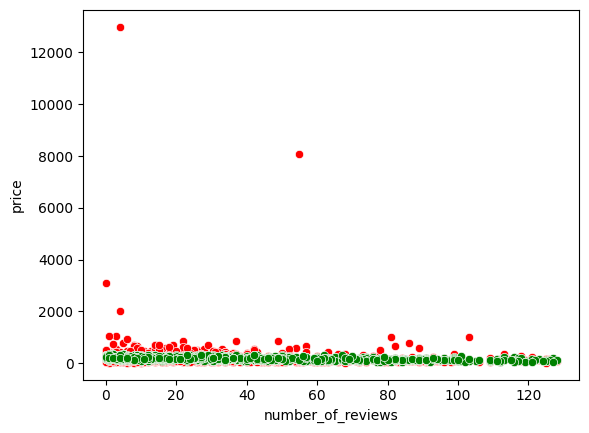

In [ ]:
#sns.scatterplot(x='availability_365', y='price', color="blue", data=filtro2)
sns.scatterplot(x='number_of_reviews', y='price', color="red", data=filtro2)
#sns.scatterplot(x='number_of_reviews', y='price', color="yellow", data=filtro2)
#sns.scatterplot(x='accommodates', y='price', color="black", data=filtro2)
sns.scatterplot(x='number_of_reviews', y='Predicciones', color="green", data=filtro2)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.013921041466291362

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.11798746317423459

##filtro **Entire home/apt** “host_acceptance_rate vs number_of_reviews,review_scores_cleanliness,review_scores_communication ”








In [ ]:
filtro3 = españa[españa["room_type"] == "Entire home/apt"]

In [ ]:
filtro3 = filtro3.replace('sin registro', pd.np.nan)

<ipython-input-750-78784c3836ad>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  filtro3 = filtro3.replace('sin registro', pd.np.nan)


In [ ]:
filtro3['host_acceptance_rate'] = filtro3['host_acceptance_rate'].replace('%', '', regex=True).astype('float') / 100

In [ ]:
filtro3['price'] = filtro3['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [ ]:
filtro3[['host_acceptance_rate',"host_response_rate"]] = filtro3[['host_acceptance_rate',"host_response_rate"]].replace('%', '', regex=True).astype('float') / 100

In [ ]:
#filtro3.dropna(inplace=True)

In [ ]:
filtro3.dropna(subset=['number_of_reviews', 'review_scores_cleanliness','review_scores_communication',"host_acceptance_rate"], inplace=True)

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

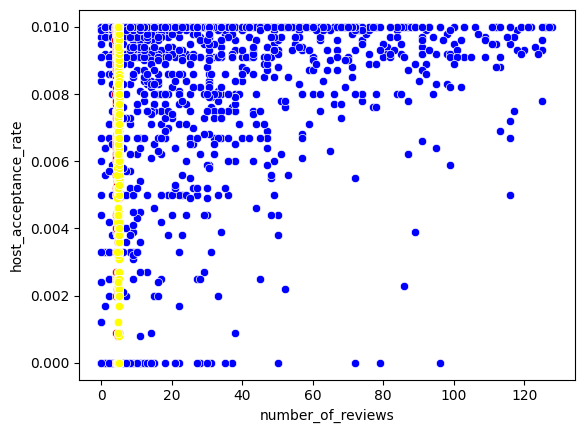

In [ ]:
from turtle import color


sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=filtro3)
sns.scatterplot(x='review_scores_cleanliness', y='host_acceptance_rate', color="red", data=filtro3)
sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="yellow", data=filtro3)
#sns.scatterplot(x='accommodates', y='host_acceptance_rate', color="black", data=filtro3)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= filtro3[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']]
Var_Dep= filtro3['host_acceptance_rate']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'review_scores_cleanliness',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([1.95107000e-05, 2.64048652e-04, 1.26292795e-04]),
 'rank_': 3,
 'singular_': array([1065.09606037,    9.49180471,    4.18634021]),
 'intercept_': 0.005730882009818035}

**Modelo matemático: y= 0.62534291x1 + 0.01978015x2 + 0.81582765x3 + 1.2098448339476615**

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.04624002260716331

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=filtro3[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']])
y_pred

array([0.00891388, 0.00781558, 0.00815392, ..., 0.00777942, 0.00842888,
       0.00773651])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
filtro3.insert(0, 'Predicciones', y_pred)
filtro3

,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2,0.008914,2,https://www.airbnb.com/rooms/1212820,01/04/2023,city scrape,Apartment port de rei stunning wiew,<b>The space</b><br />Apartments first line un...,NaN,https://a0.muscache.com/pictures/18245529/0886...,https://www.airbnb.com/users/show/6620645,...,4.31,4.81,4.76,4.74,4.32,2.0,2.0,0.0,0.0,0.62
4,0.007816,4,https://www.airbnb.com/rooms/41342,01/04/2023,previous scrape,Beachfront Tamariua (Costa Brava),A little paradise by the sea. Apartment 2/4 ad...,Apartment located outside the town on a small ...,https://a0.muscache.com/pictures/70414801/59d4...,https://www.airbnb.com/users/show/180072,...,4.82,4.73,4.73,4.91,4.36,1.0,1.0,0.0,0.0,0.09
5,0.008154,5,https://www.airbnb.com/rooms/751997,01/04/2023,city scrape,CAN FELIP - Ático loft del s.XVIII,"Magnífica casa de pueblo del siglo XVIII, ubic...",Palafrugell se remonta al siglo X. El núcleo a...,https://a0.muscache.com/pictures/f50b37b3-1c4d...,https://www.airbnb.com/users/show/3387407,...,4.69,4.69,4.90,4.79,4.59,12.0,1.9,0.0,0.0,0.34
6,0.007857,6,https://www.airbnb.com/rooms/752035,31/03/2023,city scrape,CAN TARONGETA - Soleado Apto. 1-1,Magnífico Apartamento de 62m² con 2 dormitorio...,Palafrugell se remonta al siglo X. El núcleo a...,https://a0.muscache.com/pictures/303024e1-2deb...,https://www.airbnb.com/users/show/3387407,...,4.79,4.43,4.50,4.50,4.36,12.0,1.9,0.0,0.0,0.13
8,0.008199,8,https://www.airbnb.com/rooms/45400,01/04/2023,city scrape,Begur - Loft - Costa Brava - SPAIN,<b>The space</b><br />Flat / Apartment. New. P...,NaN,https://a0.muscache.com/pictures/2206667/ea3bd...,https://www.airbnb.com/users/show/201228,...,4.73,4.93,4.94,4.89,4.70,1.0,1.0,0.0,0.0,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499,0.007952,1498,https://www.airbnb.com/rooms/8319520,01/04/2023,city scrape,House in S'Agaró with amazing views,A 132m² semi-detached house + 45m² terrace wit...,NaN,https://a0.muscache.com/pictures/105932294/2c7...,https://www.airbnb.com/users/show/43859333,...,4.82,5.00,4.88,4.94,4.63,1.0,1.0,0.0,0.0,0.21
1500,0.007753,1499,https://www.airbnb.com/rooms/10652423,01/04/2023,city scrape,Apartamento en Pals con piscina junto a la playa!,"Fabuloso apartamento en la Costa Brava, muy ce...",Nº de licencia turística: HUTG-16806,https://a0.muscache.com/pictures/68703dd4-0679...,https://www.airbnb.com/users/show/7648299,...,4.42,4.92,4.92,4.92,4.67,3.0,3.0,0.0,0.0,0.15
1504,0.007779,1503,https://www.airbnb.com/rooms/9324193,01/04/2023,city scrape,APARTAMENT ROSES / CANYELLES PETITA BEACH,"Apartment seafront, three meters are in the sa...",NaN,https://a0.muscache.com/pictures/9d667199-3ca7...,https://www.airbnb.com/users/show/22949980,...,4.64,4.55,4.82,4.64,4.27,2.0,2.0,0.0,0.0,0.13
1505,0.008429,1504,https://www.airbnb.com/rooms/8331883,01/04/2023,city scrape,Rosas Lisboa Mas Oliva,SALLE DE BAIN RÉNOVÉE FIN 2021!!! NOUVEAU CANA...,Cette résidence se trouve dans le quartier Mas...,https://a0.muscache.com/pictures/331f669f-ab20...,https://www.airbnb.com/users/show/43182264,...,4.48,4.85,4.89,4.67,4.63,1.0,1.0,0.0,0.0,0.52


In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

#sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=filtro1)
#sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=filtro1)

#sns.lineplot(x='host_response_rate', y='Predicciones', color="red", data=filtro1)

<Axes: xlabel='review_scores_cleanliness', ylabel='host_acceptance_rate'>

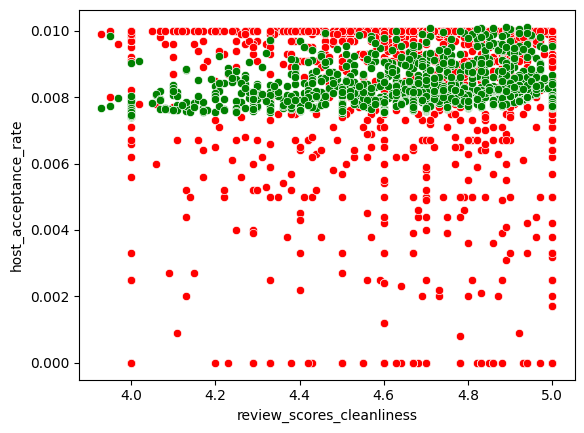

In [ ]:
#sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=filtro3)
sns.scatterplot(x='review_scores_cleanliness', y='host_acceptance_rate', color="red", data=filtro3)
#sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="yellow", data=filtro3)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones', color="green", data=filtro3)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.04624002260716331

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.2150349334577136